# Front Matter: CASA0013: Foundations of Spatial Data Science

## Title of Briefing <font color='red'>edit</font> 

### Student ID: 21203086 

### Word Count: <font color='red'>edit</font> 

# Reproducible Analysis

## Introduction-overview

This notebook holds the analysis for the classification of Airbnb penetration in London. 
After a first exploration of the datasets with visualisations that seek to quantify the current picture of Airbnb listings in London, the London wards are classified by their amaount of listings (low, medium, large), followed by a geodemographic classification of the neighboorhods that attempts to identify patterns expaining and perhaps predicting the presence or absense of listings. 

<font color='red'>edit</font> 

Data used for this analysis were obtained from the following sources:
* Airbnb listings, compiled 10 October 2021: <http://insideairbnb.com/get-the-data.html>
* London Wards data: <https://data.london.gov.uk/dataset/ward-profiles-and-atlas>
* London Wards geography: <https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london>


For ease of access the data has been saved in the following github repository: <https://github.com/DaphneBdn/fsds_cw3> 

This analysis also uses data provided by the course material: <font color='red'>ADD HERE</font> 




## Libraries

<font color='red'>edit:add all</font> 

In [19]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

## Data import

### London Boundary 

First create a background map of London that can be used for visualisations.

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

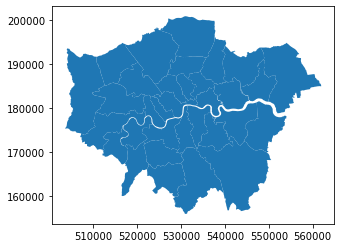

In [20]:
# Load the London Boroughs geopackage 

boros = gpd.read_file('https://github.com/DaphneBdn/fsds_assessment3/blob/main/Data/geo/Boroughs.gpkg?raw=true')
boros.plot()

In [21]:
# Convert to a geodataframe by setting the CRS to the British National grid with EPSG 27700
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

In [22]:
boros



NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0     Kingston upon Thames  E09000021   3726.117       0.000         F   
1                  Croydon  E09000008   8649.441       0.000         F   
2                  Bromley  E09000006  15013.487       0.000         F   
3                 Hounslow  E09000018   5658.541      60.755         F   
4                   Ealing  E09000009   5554.428       0.000         F   
5                 Havering  E09000016  11445.735     210.763         F   
6               Hillingdon  E09000017  11570.063       0.000         F   
7                   Harrow  E09000015   5046.330       0.000         F   
8                    Brent  E09000005   4323.270       0.000         F   
9                   Barnet  E09000003   8674.837       0.000         F   
10                 Lambeth  E09000022   2724.940      43.927         T   
11               Southwark  E09000028   2991.340     105.139         T   
12                Lewisham  E09000023   3531.706      16.795         T   
13               Greenwich  E09000011   5044.190     310.785         F   
14                  Bexley  E09000004   6428.649     370.619         F   
15                 Enfield  E09000010   8220.025       0.000         F   
16          Waltham Forest  E09000031   3880.793       0.000         F   
17               Redbridge  E09000026   5644.225       2.300         F   
18                  Sutton  E09000029   4384.698       0.000         F   
19    Richmond upon Thames  E09000027   5876.111     135.443         F   
20                  Merton  E09000024   3762.466       0.000         F   
21              Wandsworth  E09000032   3522.022      95.600         T   
22  Hammersmith and Fulham  E09000013   1715.409      75.648         T   
23  Kensington and Chelsea  E09000020   1238.379      25.994         T   
24             Westminster  E09000033   2203.005      54.308         T   
25                  Camden  E09000007   2178.932       0.000         T   
26           Tower Hamlets  E09000030   2157.501     179.707         T   
27               Islington  E09000019   1485.664       0.000         T   
28                 Hackney  E09000012   1904.902       0.000         T   
29                Haringey  E09000014   2959.837       0.000         T   
30                  Newham  E09000025   3857.806     237.637         T   
31    Barking and Dagenham  E09000002   3779.934     169.150         F   
32          City of London  E09000001    314.942      24.546         T   

                                             geometry  
0   MULTIPOLYGON (((516401.600 160201.800, 516407....  
1   MULTIPOLYGON (((535009.200 159504.700, 535005....  
2   MULTIPOLYGON (((540373.600 157530.400, 540361....  
3   MULTIPOLYGON (((521975.800 178100.000, 521967....  
4   MULTIPOLYGON (((510253.500 182881.600, 510249....  
5   MULTIPOLYGON (((549893.900 181459.800, 549894....  
6   MULTIPOLYGON (((510599.800 191689.500, 510615....  
7   MULTIPOLYGON (((510599.800 191689.500, 510660....  
8   MULTIPOLYGON (((525201.000 182512.600, 525181....  
9   MULTIPOLYGON (((524579.900 198355.200, 524594....  
10  MULTIPOLYGON (((530046.800 177893.400, 530048....  
11  MULTIPOLYGON (((531335.600 180529.500, 531337....  
12  MULTIPOLYGON (((536691.000 178958.600, 536691....  
13  MULTIPOLYGON (((537238.700 178137.700, 537242....  
14  MULTIPOLYGON (((547226.200 181299.300, 547320....  
15  MULTIPOLYGON (((531023.500 200933.600, 531039....  
16  MULTIPOLYGON (((539923.100 191863.100, 539928....  
17  MULTIPOLYGON (((543595.500 184832.800, 543577....  
18  MULTIPOLYGON (((528552.300 159658.100, 528399....  
19  MULTIPOLYGON (((516677.500 175383.800, 516678....  
20  MULTIPOLYGON (((529906.200 167417.300, 529902....  
21  MULTIPOLYGON (((523489.600 176224.800, 523500....  
22  MULTIPOLYGON (((521975.800 178100.000, 521973....  
23  MULTIPOLYGON (((526219.700 176948.000, 526208....  
24  MULTIPOLYGON (((528549.500 177903.800, 528542....  
25  MULTIPOLYGON (((528840.200 187217.800, 528834

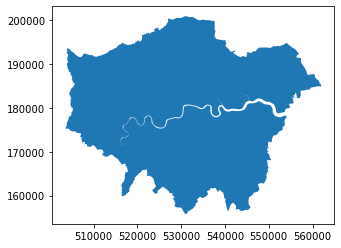

In [23]:
# Create the London shape (for later use)
ldn['geometry'] = ldn.original.buffer(20)
ldn_shape = ldn.set_geometry('geometry')
ldn_shape.plot();

### Airbnb Data

The London Airbnb listigns data set used here is the latest from [Inside Airbnb](http://insideairbnb.com/get-the-data.html), which according to the website was compiled on 10 October, 2021.

In [27]:
# Load in the Airbnb data 
df = pd.read_csv('https://github.com/DaphneBdn/fsds_assessment3/blob/main/Data/raw/listings.csv.gz?raw=true', compression='gzip')
df.head(3)

id                         listing_url       scrape_id last_scraped  \
0  13913  https://www.airbnb.com/rooms/13913  20211010233627   2021-10-12   
1  15400  https://www.airbnb.com/rooms/15400  20211010233627   2021-10-12   
2  17402  https://www.airbnb.com/rooms/17402  20211010233627   2021-10-12   

                                    name  \
0    Holiday London DB Room Let-on going   
1    Bright Chelsea  Apartment. Chelsea!   
2  Superb 3-Bed/2 Bath & Wifi: Trendy W1   

                                         description  \
0  My bright double bedroom with a large window h...   
1  Lots of windows and light.  St Luke's Gardens ...   
2  You'll have a wonderful stay in this superb mo...   

                               neighborhood_overview  \
0  Finsbury Park is a friendly melting pot commun...   
1                                     It is Chelsea.   
2  Location, location, location! You won't find b...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
1  https://a0.muscache.com/pictures/428392/462d26...    60302   
2  https://a0.muscache.com/pictures/39d5309d-fba7...    67564   

                                  host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/54730  ...                        4.89   
1  https://www.airbnb.com/users/show/60302  ...                        4.82   
2  https://www.airbnb.com/users/show/67564  ...                        4.66   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.63                4.74     NaN                f   
1                   4.93                4.73     NaN                f   
2                   4.85                4.59     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           1   
1                              1                                           1   
2                              2                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.17  
1                                           0              0.79  
2                                           0              0.35  

[3 rows x 74 columns]

In [28]:
# extract the column names
cols=df.columns
print(cols)
print()
print(f"The Inside Airbnb dataset has {len(cols)} columns")

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

Reducing the number of columns to make the dataset more manageable and to get a better overview. Prepare the data for the first exploration and summary statistics.

In [29]:
# store the columns of interest in a list
sub_cols=['id', 'name','latitude','longitude', 'property_type', 'room_type', 'price',
          'availability_365', 'number_of_reviews_l30d', 'first_review','last_review']
# create a subframe with the stored columns
df= df[sub_cols]
df.set_index('id', inplace=True)
df.head()


name  latitude  longitude  \
id                                                                              
13913                Holiday London DB Room Let-on going  51.56861   -0.11270   
15400                Bright Chelsea  Apartment. Chelsea!  51.48780   -0.16813   
17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1  51.52195   -0.14094   
17506  Boutique Chelsea/Fulham Double bed 5-star ensuite  51.47935   -0.19743   
24328  Battersea bedroom & studio, parking, shared ga...  51.47119   -0.16256   

                     property_type        room_type    price  \
id                                                             
13913  Private room in rental unit     Private room   $65.00   
15400           Entire rental unit  Entire home/apt   $75.00   
17402           Entire rental unit  Entire home/apt  $307.00   
17506    Private room in townhouse     Private room  $150.00   
24328             Entire townhouse  Entire home/apt  $200.00   

       availability_365  number_of_reviews_l30d first_review last_review  
id                                                                        
13913               339                       0   2011-07-11  2011-09-13  
15400                 2                       0   2012-07-16  2019-08-10  
17402               320                       0   2011-09-18  2019-11-02  
17506               364                       0          NaN         NaN  
24328               273                       0   2011-11-01  2015-10-24

### First dataset exploration

In [30]:
# change settings to display all rows
pd.set_option('display.max_rows', None)
# investigate NA values by printing out the count of NA values per column 
df.isna().sum().sort_values(ascending=False)

first_review              19028
last_review               19028
name                         24
latitude                      0
longitude                     0
property_type                 0
room_type                     0
price                         0
availability_365              0
number_of_reviews_l30d        0
dtype: int64

In [31]:
# change settings back 
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [32]:
# check the datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67903 entries, 13913 to 52717191
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    67879 non-null  object 
 1   latitude                67903 non-null  float64
 2   longitude               67903 non-null  float64
 3   property_type           67903 non-null  object 
 4   room_type               67903 non-null  object 
 5   price                   67903 non-null  object 
 6   availability_365        67903 non-null  int64  
 7   number_of_reviews_l30d  67903 non-null  int64  
 8   first_review            48875 non-null  object 
 9   last_review             48875 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 5.7+ MB


In [33]:
# size of dataframe
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 67,903 x 10


After inspecting the data the key things to note are: 
* There are 67903 listings in total
* There are no NA values in the longitude and latitude column, so no listings need to be removed before converting to a geodataframe
* 19028 NA values in the review columns. 
* Columns containing date information can be converted to date type for easier handling
* The price column is not a float, so would need to be adjusted before using in any analysis. 

Using the longitude and latitude information the dataframe(df) can be convertd into a geodataframe using the epsg code for the World Geodetic System 1984, then convert to British National Grid 

In [34]:
#convert to geodataframe
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df.longitude, df.latitude, 
                       crs= 'epsg:4326'))
#change crs to BNG
gdf = gdf.to_crs('epsg:27700')

<AxesSubplot:>

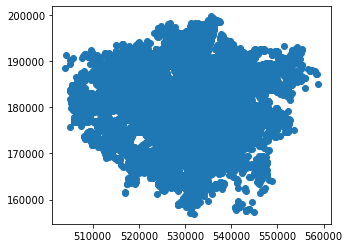

In [35]:
#check the geodataframe with a quick plot
gdf.plot()

### Quantify Airbnb listings

<font color='red'>map with price here?</font> 


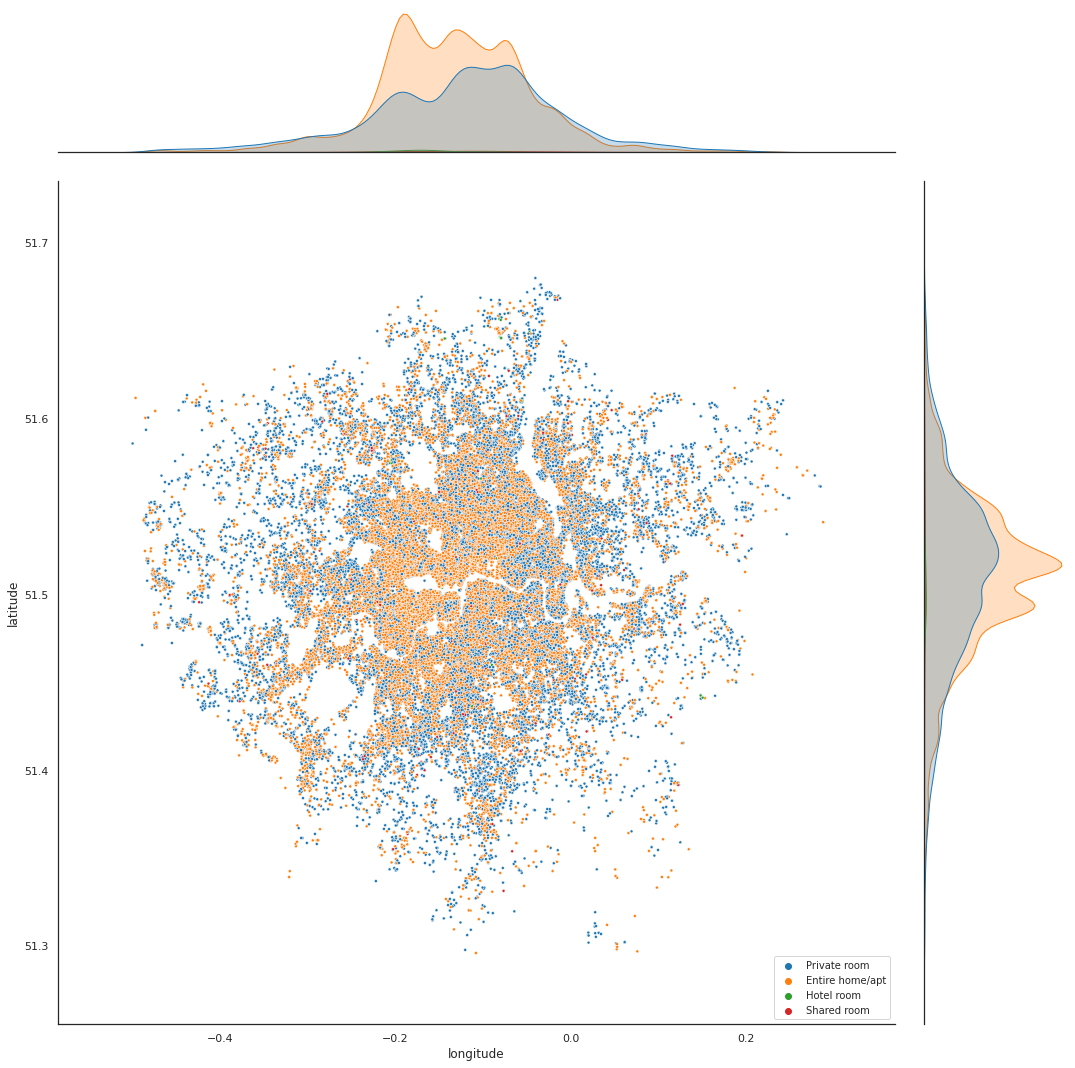

In [226]:
sns.set(style="white")
g = sns.jointplot(data=gdf, x='longitude', y='latitude', marker=".",
                  hue='room_type', height=15 ,palette="tab10")
g.ax_joint.legend(loc='lower right', prop={'size': 10});


Visualise the Airbnb listings across London to get a first impression of the amount of listings in the city.
It would also be interesting to separate and plot a comparison between active and inactive Listings across London 

In order to filter out the active listings , this analysis will consider the last review date as indicator. 
Any review in the past year from the date the data was compiled (2021-10-10) will deem the listing active

In [37]:
gdf.sample(4, random_state=42)

name  latitude  \
id                                                                      
42409608            Cosy two bedroom home full of character  51.43951   
39318693      Frills-free yet Clean and Comfortable Bedroom  51.51699   
29555250  Unmissable Luxurious Mews House in Central London  51.49980   
19248360           Wonderful Private room+tea/coffee&sweets  51.53640   

          longitude                        property_type        room_type  \
id                                                                          
42409608   -0.19965                   Entire rental unit  Entire home/apt   
39318693   -0.06882  Private room in condominium (condo)     Private room   
29555250   -0.14976              Entire residential home  Entire home/apt   
19248360    0.01036          Private room in rental unit     Private room   

            price  availability_365  number_of_reviews_l30d first_review  \
id                                                                         
42409608  $100.00                 0                       0          NaN   
39318693   $17.00                 0                       0   2019-10-25   
29555250  $625.00               200                       0   2019-01-11   
19248360   $25.00                 0                       0   2017-06-25   

         last_review                       geometry  
id                                                   
42409608         NaN  POINT (525228.295 172705.369)  
39318693  2019-10-27  POINT (534093.520 181552.877)  
29555250  2018-12-19  POINT (528526.190 179496.193)  
19248360  2018-10-11  POINT (539527.700 183859.253)

In [38]:
# convert the values in the last review column to datetime type
gdf["last_review"]= pd.to_datetime(gdf["last_review"], infer_datetime_format=True)
#check
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 67903 entries, 13913 to 52717191
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    67879 non-null  object        
 1   latitude                67903 non-null  float64       
 2   longitude               67903 non-null  float64       
 3   property_type           67903 non-null  object        
 4   room_type               67903 non-null  object        
 5   price                   67903 non-null  object        
 6   availability_365        67903 non-null  int64         
 7   number_of_reviews_l30d  67903 non-null  int64         
 8   first_review            48875 non-null  object        
 9   last_review             48875 non-null  datetime64[ns]
 10  geometry                67903 non-null  geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), int64(2), object(5)
memory usage: 6.2+ MB


In [39]:
# first remove the columns with no info for "last review" 
active_gdf = gdf.drop(gdf[gdf.last_review.isna()].index.values, axis=0)
# Filter for active listings
active_gdf = gdf.loc[gdf["last_review"] >= '2020-10-10']

# Display
active_gdf.sample(4, random_state=42)

name  latitude  \
id                                                                      
7019406                Spacious Classy Portobello Apartment  51.52359   
51033334      Superb 1 Bed Flat - Brick Lane (Free Parking)  51.52397   
47173303                    Beautiful room in Little Venice  51.52274   
26120791  Clean and Spacious Balcony Room - 15m to Hyde ...  51.53076   

          longitude                        property_type        room_type  \
id                                                                          
7019406    -0.20824                   Entire rental unit  Entire home/apt   
51033334   -0.06481           Entire condominium (condo)  Entire home/apt   
47173303   -0.19467  Private room in condominium (condo)     Private room   
26120791   -0.18641          Private room in rental unit     Private room   

            price  availability_365  number_of_reviews_l30d first_review  \
id                                                                         
7019406   $170.00               365                       0   2018-08-06   
51033334  $110.00                 0                       1   2021-07-26   
47173303   $40.00                11                       0   2020-12-27   
26120791   $50.00               115                       0   2018-07-16   

         last_review                       geometry  
id                                                   
7019406   2021-06-29  POINT (524402.487 182040.773)  
51033334  2021-10-04  POINT (534351.206 182336.422)  
47173303  2021-05-25  POINT (525346.187 181969.387)  
26120791  2021-07-24  POINT (525897.098 182875.417)

In [40]:
print(f"There are {active_gdf.shape[0]} active listings and {gdf.shape[0]} total listings")
print(f"The active listings are  {active_gdf.shape[0] *100 / gdf.shape[0]:,.2f}% of the total listings.")


There are 13577 active listings and 67903 total listings
The active listings are  19.99% of the total listings.


### Comparison map 


<font color='red'>NOTE: change colours, source?</font> 

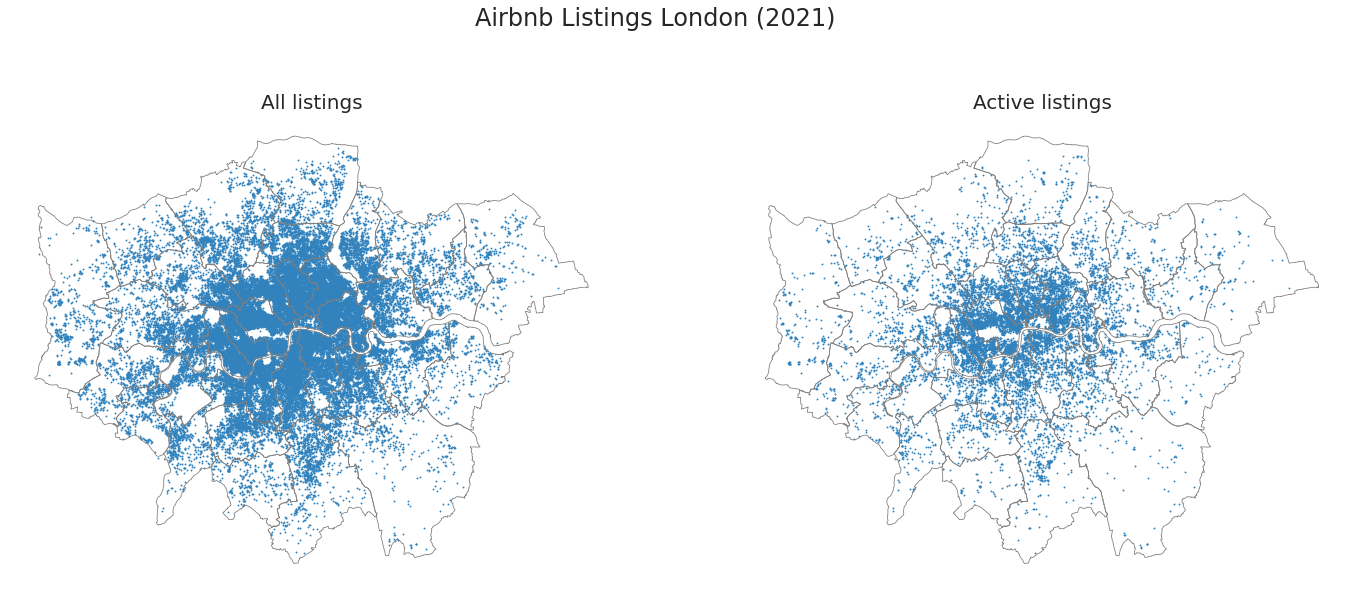

In [248]:
#create a base axis for the plot
fig, axes = plt.subplots(1,2, figsize = (24,16))


#CB = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']


plt1 = 'All listings'
plt2 = 'Active listings'

#plot the London outline 
boros.boundary.plot(ax=axes[0], edgecolor = "grey", linewidth=0.8)

#plot the airbnb listings
gdf.plot(ax = axes[0], color="#3182bd" , markersize = 0.8, legend=True)



#plot the London outline 
boros.boundary.plot(ax=axes[1], edgecolor = "grey", linewidth=0.8)

#plot the active airbnb listings
active_gdf.plot(ax = axes[1], color= "#3182bd", markersize = 0.8, legend=True)


#set the axis off
for ax in axes:
    ax.axis('off')

#add title

fig.suptitle('Airbnb Listings London (2021)', y=0.8,ha='center', size=24)
axes[0].set_title(plt1.capitalize(), size=20)
axes[1].set_title(plt2.capitalize(), size=20)

#plt.show()

plt.savefig("Active_Airbnb_map_comparison_dots.png", bbox_inches = 'tight')

The maps above show the magnitute of the Airbnb listings count across the area of London. Even the outer Boroughs seem to a substantial amount of listings. While the active listings are significantly less, the emerging pattern remains the same: high concentration of listing in the centre that spread outwards in smaller intensity. 

### Bar chart comparing Airbnb listings density across London Boroughs

In [42]:
# First join the Airbnb listings to the London Boroughs geometry
joined_boroughs = gpd.sjoin(gdf, boros, how='right', op='within').drop(columns=['latitude','longitude','index_left'])
joined_boroughs.head()

name  \
0   Spacious garden cabin, peaceful setting & homely   
0                                Greater London Flat   
0  3 bedroom flat with 4k TVs, Sky/Netflix & Parking   
0              Quite & Peaceful House in Chessington   
0    Beautiful 3 Bedroom House in Chessington Surrey   

                 property_type        room_type    price  availability_365  \
0        Private room in cabin     Private room   $55.00                25   
0  Private room in rental unit     Private room   $80.00               173   
0   Entire condominium (condo)  Entire home/apt  $131.00                75   
0      Entire residential home  Entire home/apt  $130.00               226   
0      Entire residential home  Entire home/apt  $149.00               353   

   number_of_reviews_l30d first_review last_review                  NAME  \
0                       2   2019-10-05  2021-10-04  Kingston upon Thames   
0                       0          NaN         NaT  Kingston upon Thames   
0                       2   2021-09-17  2021-09-27  Kingston upon Thames   
0                       0          NaN         NaT  Kingston upon Thames   
0                       1   2020-05-31  2021-09-18  Kingston upon Thames   

    GSS_CODE  HECTARES  NONLD_AREA ONS_INNER  \
0  E09000021  3726.117         0.0         F   
0  E09000021  3726.117         0.0         F   
0  E09000021  3726.117         0.0         F   
0  E09000021  3726.117         0.0         F   
0  E09000021  3726.117         0.0         F   

                                            geometry  
0  MULTIPOLYGON (((516401.600 160201.800, 516407....  
0  MULTIPOLYGON (((516401.600 160201.800, 516407....  
0  MULTIPOLYGON (((516401.600 160201.800, 516407....  
0  MULTIPOLYGON (((516401.600 160201.800, 516407....  
0  MULTIPOLYGON (((516401.600 160201.800, 516407....

In [43]:
#insert new columns:

# count of listings per Borough
joined_boroughs["listings_count"]=joined_boroughs.groupby(["GSS_CODE"])["price"].transform("count")

#calculate density of listings per Borough
joined_boroughs["listings_density"]=joined_boroughs["listings_count"]/joined_boroughs["HECTARES"]
joined_boroughs.head(2)


name  \
0  Spacious garden cabin, peaceful setting & homely   
0                               Greater London Flat   

                 property_type     room_type   price  availability_365  \
0        Private room in cabin  Private room  $55.00                25   
0  Private room in rental unit  Private room  $80.00               173   

   number_of_reviews_l30d first_review last_review                  NAME  \
0                       2   2019-10-05  2021-10-04  Kingston upon Thames   
0                       0          NaN         NaT  Kingston upon Thames   

    GSS_CODE  HECTARES  NONLD_AREA ONS_INNER  \
0  E09000021  3726.117         0.0         F   
0  E09000021  3726.117         0.0         F   

                                            geometry  listings_count  \
0  MULTIPOLYGON (((516401.600 160201.800, 516407....             489   
0  MULTIPOLYGON (((516401.600 160201.800, 516407....             489   

   listings_density  
0          0.131236  
0          0.131236

In [44]:
# group by Borough and drop unnecessary columns, then sort by density so that the barchart can be ordered
list_boros = joined_boroughs.groupby(["GSS_CODE","NAME"]).sum().drop(columns=["availability_365","number_of_reviews_l30d","NONLD_AREA"]).reset_index().sort_values("listings_density", ascending=False)
list_boros

GSS_CODE                    NAME      HECTARES  listings_count  \
32  E09000033             Westminster  1.592552e+07        52258441   
19  E09000020  Kensington and Chelsea  5.929359e+06        22924944   
29  E09000030           Tower Hamlets  1.225245e+07        32251041   
11  E09000012                 Hackney  9.863583e+06        26811684   
18  E09000019               Islington  5.835688e+06        15429184   
6   E09000007                  Camden  1.006449e+07        21335161   
27  E09000028               Southwark  1.198929e+07        16064064   
12  E09000013  Hammersmith and Fulham  5.206266e+06         9211225   
21  E09000022                 Lambeth  1.034932e+07        14424804   
31  E09000032              Wandsworth  1.243626e+07        12467961   
13  E09000014                Haringey  5.594092e+06         3572100   
22  E09000023                Lewisham  6.795002e+06         3701776   
4   E09000005                   Brent  8.248799e+06         3640464   
24  E09000025                  Newham  6.195636e+06         2579236   
8   E09000009                  Ealing  8.748224e+06         2480625   
10  E09000011               Greenwich  7.414959e+06         2160900   
30  E09000031          Waltham Forest  4.889799e+06         1587600   
0   E09000001          City of London  1.121194e+05          126736   
23  E09000024                  Merton  4.142475e+06         1212201   
2   E09000003                  Barnet  1.304695e+07         2262016   
26  E09000027    Richmond upon Thames  6.140536e+06         1092025   
17  E09000018                Hounslow  5.596297e+06          978121   
7   E09000008                 Croydon  9.125160e+06         1113025   
25  E09000026               Redbridge  3.471198e+06          378225   
20  E09000021    Kingston upon Thames  1.822071e+06          239121   
1   E09000002    Barking and Dagenham  1.474174e+06          152100   
9   E09000010                 Enfield  4.693634e+06          326041   
14  E09000015                  Harrow  2.169922e+06          184900   
16  E09000017              Hillingdon  6.652786e+06          330625   
5   E09000006                 Bromley  8.152323e+06          294849   
28  E09000029                  Sutton  1.205792e+06           75625   
3   E09000004                  Bexley  1.748593e+06           73984   
15  E09000016                Havering  2.918662e+06           65025   

    listings_density  
32      23721.435494  
19      18512.058102  
29      14948.331890  
11      14075.098876  
18      10385.379197  
6        9791.568071  
27       5370.189948  
12       5369.696090  
21       5293.622612  
31       3540.000886  
13       1206.856999  
22       1048.155198  
4         842.062605  
24        668.575869  
8         446.603143  
10        428.393855  
30        409.091647  
0         402.410603  
23        322.182579  
2         260.756023  
26        185.841452  
17        172.857456  
7         128.681726  
25         67.010971  
20         64.174313  
1          40.238798  
9          39.664235  
14         36.640489  
16         28.575903  
5          19.638942  
28         17.247482  
3          11.508483  
15          5.681155

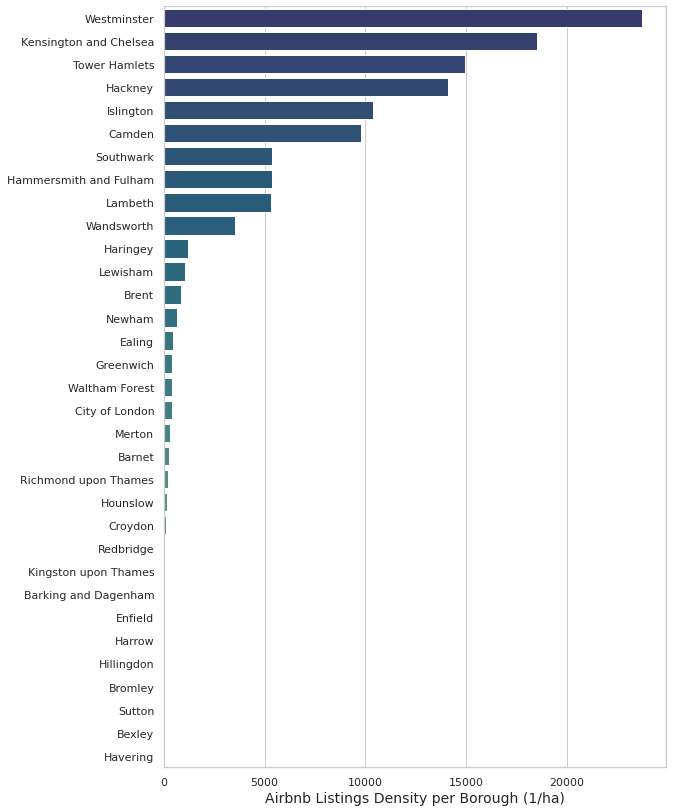

In [229]:
# create bar chart

sns.set(style="whitegrid")
#sns.set_theme(style='darkgrid')
plt.figure(figsize=(9, 14))

ax = sns.barplot( x="listings_density",
                  y="NAME", 
                 #hue="room_type",
                  data=list_boros,
                  order = list_boros["NAME"],
                  palette="crest_r")

plt.xlabel("Airbnb Listings Density per Borough (1/ha)", size=14)
plt.ylabel(None, size=14)

plt.savefig("Barplot_Listings_Density_per_Borough.png", bbox_inches = 'tight')

# Spacial unit

The London Boroughs are relatively large spacial units that will not capture more fine-grained variation across the city's urban fabric. Therefore the subsequent analysis will be based on smaller spacial unit the Greater London Wards. These are chosen above MSOAs or LSOAs, in order to make use of the London Wards Profiles from the London Datastore that provides key summary measures that will be used in this analysis. (+see literature and explain better)

"The ward profiles and ward atlas provide a range of demographic and related data for each ward in Greater London. They are designed to provide an overview of the population in these small areas by presenting a range of data on the population, diversity, households, life expectancy, housing, crime, benefits, land use, deprivation, and employment" (source:https://data.london.gov.uk/dataset/ward-profiles-and-atlas)

Following data sets will be used:
* London Wards geopackage
* London Wards csv file

## London Wards (geometry)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

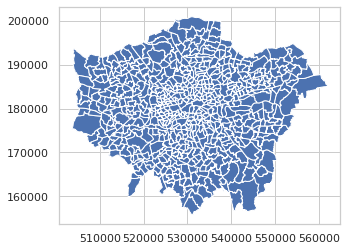

In [46]:
# load the Wards geopackage
wards_geo = gpd.read_file('https://github.com/DaphneBdn/fsds_assessment3/blob/main/Data/geo/london_wards.gpkg?raw=true')
wards_geo.plot()

In [47]:
#make sure the crs is in BNG
wards_geo = wards_geo.to_crs('epsg:27700')

In [48]:
#check there are no NA values
wards_geo[wards_geo.isna().any(axis=1)]

Empty GeoDataFrame
Columns: [NAME, GSS_CODE, HECTARES, NONLD_AREA, LB_GSS_CD, BOROUGH, POLY_ID, geometry]
Index: []

In [210]:
# Statistical definition

in_ldn = [
    "City of London",
    "Camden",
    "Newham",
    "Hackney",
    "Hammersmith and Fulham",
    "Islington",
    "Kensington and Chelsea",
    "Lambeth",
    "Lewisham",
    "Southwark",
    "Tower Hamlets",
    "Wandsworth",
    "Westminster",
    "Haringey"
]

In [213]:
fltr = wards_geo["BOROUGH"].isin(in_ldn)
boros_il = wards_geo[fltr]

<AxesSubplot:>

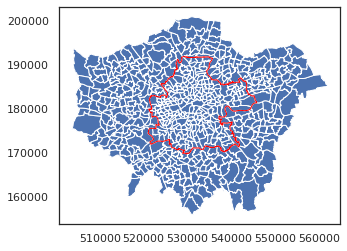

In [214]:
ax = wards_geo.plot()
gpd.GeoSeries(boros_il.unary_union).plot(ax=ax, edgecolor="red", facecolor="none")

## London Ward Profiles (data)

In [49]:
# Load in the Ward profiles
ward_profiles = pd.read_csv('https://github.com/DaphneBdn/fsds_assessment3/blob/main/Data/raw/ward-profiles-excel-version.csv?raw=true',encoding= 'latin-1')
ward_profiles.tail(3)

Ward name Old code   New code  Population - 2015  \
657  Westminster     00BK  E09000033           230550.0   
658       London        H  E12000007          8632850.0   
659      England      921  E92000001         54613400.0   

     Children aged 0-15 - 2015  Working-age (16-64) - 2015  \
657                    33900.0                    170350.0   
658                  1726900.0                   5923600.0   
659                 10335450.0                  34540350.0   

     Older people aged 65+ - 2015  % All Children aged 0-15 - 2015  \
657                       26300.0                             14.7   
658                      982400.0                             20.0   
659                     9737650.0                             18.9   

     % All Working-age (16-64) - 2015  % All Older people aged 65+ - 2015  \
657                              73.9                                11.4   
658                              68.6                                11.4   
659                              63.2                                17.8   

     ...  A-Level Average Point Score Per Student - 2013/14  \
657  ...                                              680.5   
658  ...                                              689.9   
659  ...                                              696.3   

     A-Level Average Point Score Per Entry; 2013/14  Crime rate - 2014/15  \
657                                           210.2                 238.3   
658                                           211.4                  83.3   
659                                           211.5                  66.9   

     Violence against the person rate - 2014/15  \
657                                        39.5   
658                                        23.4   
659                                        13.4   

     Deliberate Fires per 1,000 population - 2014  \
657                                           0.2   
658                                           0.5   
659                                           NaN   

     % area that is open space - 2014  Cars per household - 2011  \
657                              28.6                        0.5   
658                              39.1                        0.8   
659                               NaN                        1.1   

     Average Public Transport Accessibility score - 2014  \
657                                                6.5     
658                                                3.8     
659                                                NaN     

     % travel by bicycle to work - 2011  Turnout at Mayoral election - 2012  
657                                 4.8                                37.7  
658                                 4.0                                34.2  
659                                 2.9                                 NaN  

[3 rows x 67 columns]

For the purposes of this analysis, just a small subset of variables will be used for the classification of the London wards. 

Using the already normalides measures available following variables are selected:
* Median Age
* Population Density
* Percentage of BAME population
* Median Household income (estimate)
* Percentage of Flats,maisonettes or apartments
* Percentage of population with higher education 
* Average public Transport Accessiblity score

The selection, whilst not exhaustive , aims to capture geodeographic, social and economic characteristics of the subregions.

In [50]:
# store variables of interest in a list
keep_ward=["Ward name",
           "New code",
           "Median Age - 2013", 
           "Population density (persons per sq km) - 2013",
           "% BAME - 2011",
           "Median Household income estimate (2012/13)",
           "% Flat, maisonette or apartment - 2011",
           "% with Level 4 qualifications and above - 2011",
           "Average Public Transport Accessibility score - 2014" ]
# subset the dataframe
ward_data=ward_profiles[keep_ward]
# tidy up the column names
ward_data = ward_data.rename(columns={'Area_name':'Borough',
                          "New code":'Ward code',
                          "Median Age - 2013": "Median Age",
                          "Population density (persons per sq km) - 2013":"Pop density",
                          "% BAME - 2011":"BAME perc",
                          "Median Household income estimate (2012/13)":"Median income",
                          "% Flat, maisonette or apartment - 2011": "Flat perc",
                          "% with Level 4 qualifications and above - 2011": "High educ perc",
                          "Average Public Transport Accessibility score - 2014": "Transport"})
ward_data.tail()

Ward name  Ward code  Median Age  Pop density  BAME perc  \
655  Waltham Forest  E09000031        33.0       6897.0       47.8   
656      Wandsworth  E09000032        32.0       8853.9       28.6   
657     Westminster  E09000033        34.0      10285.8       38.3   
658          London  E12000007        33.0       5292.6       40.2   
659         England  E92000001        39.0        413.5       14.6   

     Median income  Flat perc  High educ perc  Transport  
655        39460.0       41.2            30.0        3.6  
656        66220.0       65.9            53.6        4.3  
657        80760.0       89.2            50.3        6.5  
658        51770.0       52.2            37.7        3.8  
659        30763.3       21.6            27.2        NaN

The last two entries are not wards but seem to be a London and England wide summary. These rows will be removed

In [51]:
ward_data.drop(index=[658,659], inplace=True)
ward_data.tail()

Ward name  Ward code  Median Age  Pop density  BAME perc  \
653          Sutton  E09000029        38.0       4480.3       21.4   
654   Tower Hamlets  E09000030        29.0      12564.7       54.8   
655  Waltham Forest  E09000031        33.0       6897.0       47.8   
656      Wandsworth  E09000032        32.0       8853.9       28.6   
657     Westminster  E09000033        34.0      10285.8       38.3   

     Median income  Flat perc  High educ perc  Transport  
653        49170.0       35.4            30.1        2.9  
654        45720.0       85.9            41.0        5.0  
655        39460.0       41.2            30.0        3.6  
656        66220.0       65.9            53.6        4.3  
657        80760.0       89.2            50.3        6.5

In [52]:
# check for other NA values
ward_data[ward_data.isna().any(axis=1)]

Empty DataFrame
Columns: [Ward name, Ward code, Median Age, Pop density, BAME perc, Median income, Flat perc, High educ perc, Transport]
Index: []

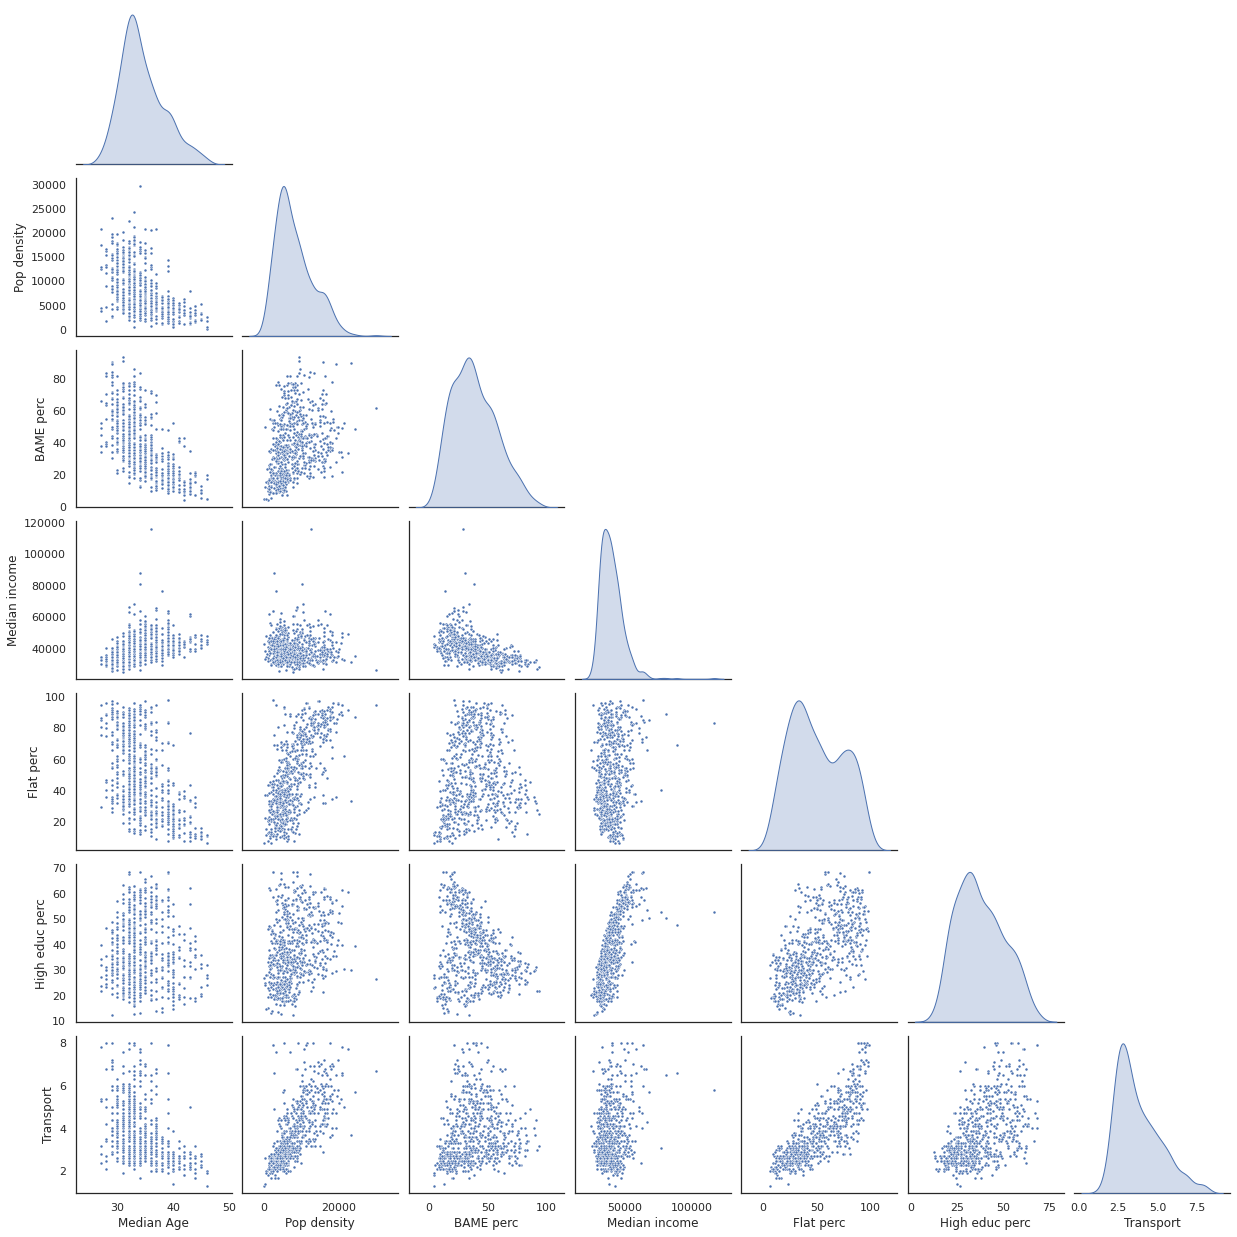

In [230]:
# using a quick plot to visualise the distribution of the variables
sns.set(style="white")
sns.pairplot(data=ward_data, markers=".", diag_kind='kde', corner=True)

### Airbnb Listings per Ward

After joining the airbnb listings to the wards geometry, the count and density of listings per Ward is calculated. This is then plotted on a map

NOTE: USING ACTIVE LISTINGS ONLY

In [54]:
joined_wards = gpd.sjoin(active_gdf, wards_geo, how='right', op='within').drop(columns=['latitude','longitude','index_left'])
joined_wards.head()


name  \
0    Cosy detached studio- walking distance to CWOA!   
0       Chessington Retreat Near World of Adventures   
0  Chessington Staycation : Close to   CWOAResort...   
0   Spacious garden cabin, peaceful setting & homely   
0  3 bedroom flat with 4k TVs, Sky/Netflix & Parking   

                property_type        room_type    price  availability_365  \
0           Entire guesthouse  Entire home/apt   $86.00             316.0   
0     Entire residential home  Entire home/apt   $86.00              18.0   
0     Entire residential home  Entire home/apt  $154.00             259.0   
0       Private room in cabin     Private room   $55.00              25.0   
0  Entire condominium (condo)  Entire home/apt  $131.00              75.0   

   number_of_reviews_l30d first_review last_review               NAME  \
0                     7.0   2021-05-01  2021-10-09  Chessington South   
0                     1.0   2019-08-02  2021-10-10  Chessington South   
0                     2.0   2021-08-28  2021-09-27  Chessington South   
0                     2.0   2019-10-05  2021-10-04  Chessington South   
0                     2.0   2021-09-17  2021-09-27  Chessington South   

    GSS_CODE  HECTARES  NONLD_AREA  LB_GSS_CD               BOROUGH  POLY_ID  \
0  E05000405   755.173         0.0  E09000021  Kingston upon Thames    50840   
0  E05000405   755.173         0.0  E09000021  Kingston upon Thames    50840   
0  E05000405   755.173         0.0  E09000021  Kingston upon Thames    50840   
0  E05000405   755.173         0.0  E09000021  Kingston upon Thames    50840   
0  E05000405   755.173         0.0  E09000021  Kingston upon Thames    50840   

                                            geometry  
0  POLYGON ((516401.600 160201.800, 516407.300 16...  
0  POLYGON ((516401.600 160201.800, 516407.300 16...  
0  POLYGON ((516401.600 160201.800, 516407.300 16...  
0  POLYGON ((516401.600 160201.800, 516407.300 16...  
0  POLYGON ((516401.600 160201.800, 516407.300 16...

In [55]:
#insert new columns

# count of listings per ward
joined_wards["listings_count"]=joined_wards.groupby(["GSS_CODE"])["price"].transform("count")

In [56]:
#calculate density of listings per ward

joined_wards["listings_density"]=joined_wards["listings_count"]/joined_wards["HECTARES"]
joined_wards.head(2)


name            property_type  \
0  Cosy detached studio- walking distance to CWOA!        Entire guesthouse   
0     Chessington Retreat Near World of Adventures  Entire residential home   

         room_type   price  availability_365  number_of_reviews_l30d  \
0  Entire home/apt  $86.00             316.0                     7.0   
0  Entire home/apt  $86.00              18.0                     1.0   

  first_review last_review               NAME   GSS_CODE  HECTARES  \
0   2021-05-01  2021-10-09  Chessington South  E05000405   755.173   
0   2019-08-02  2021-10-10  Chessington South  E05000405   755.173   

   NONLD_AREA  LB_GSS_CD               BOROUGH  POLY_ID  \
0         0.0  E09000021  Kingston upon Thames    50840   
0         0.0  E09000021  Kingston upon Thames    50840   

                                            geometry  listings_count  \
0  POLYGON ((516401.600 160201.800, 516407.300 16...               8   
0  POLYGON ((516401.600 160201.800, 516407.300 16...               8   

   listings_density  
0          0.010594  
0          0.010594

Note:
As only active listings are being used, it is possible that some wards do not have any listings. To avoid problems in the analysis that follows, the 0 in the listings_density column will be replaced by 0.0001 

In [57]:
# change the 0 values to 0.0001 in the listings_density columns so that log transformation will work
# no_listings = joined_wards.index[joined_wards['listings_count']==0].tolist()

for x in joined_wards.loc[joined_wards['listings_count']==0].index:
    joined_wards.at[x,"listings_density"]=0.0001

# check it worked
joined_wards.loc[joined_wards["listings_density"]==0]

Empty GeoDataFrame
Columns: [name, property_type, room_type, price, availability_365, number_of_reviews_l30d, first_review, last_review, NAME, GSS_CODE, HECTARES, NONLD_AREA, LB_GSS_CD, BOROUGH, POLY_ID, geometry, listings_count, listings_density]
Index: []

<AxesSubplot:ylabel='Frequency'>

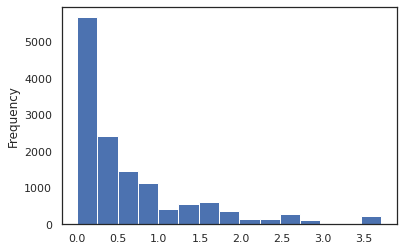

In [58]:
# plot histogram of the listings distribution 
joined_wards['listings_density'].plot.hist(bins=15) 

The listings density is heavily skewed. Let's check if a log transformation will produce a distribution closer to the normal distribution 

In [59]:
# add a column taking the log 
joined_wards["ln_listings_density"]= np.log(joined_wards["listings_density"])

<AxesSubplot:ylabel='Frequency'>

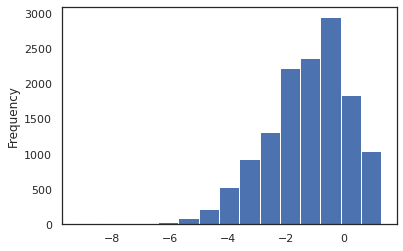

In [60]:
joined_wards['ln_listings_density'].plot.hist(bins=15) # histogram

After log transforming the data the distribution seems slightly more normal

AttributeError: module 'palettable.matplotlib' has no attribute 'Viridis_r_5'

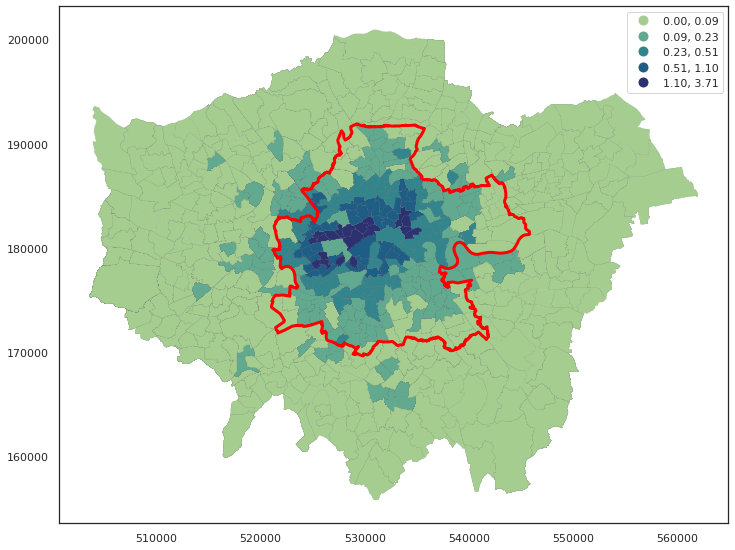

In [243]:
# plot the listings density on a london map

import pysal as ps
# https://github.com/pysal/mapclassify
import mapclassify as mc
# https://jiffyclub.github.io/palettable/
import palettable.matplotlib as palmpl
from legendgram import legendgram

f,ax = plt.subplots(figsize=(12,10))
joined_wards.plot(column='listings_density', scheme='quantiles', cmap='crest',edgecolor='grey',linewidth=0.1, k=5, ax=ax, legend=True)
q = mc.Quantiles(joined_wards.listings_density.values, k=5)

# add the inner london boundary 
gpd.GeoSeries(boros_il.unary_union).plot(ax=ax, edgecolor="red", facecolor="none", linewidth=3)

# https://github.com/pysal/legendgram/blob/master/legendgram/legendgram.py
legendgram(f, ax, 
               joined_wards.listings_density, q.bins, palmpl.Viridis_5,
               legend_size=(.4,.2), # legend size in fractions of the axis
               loc = 'lower left', # mpl-style legend loc
              # clip = (0,500), # clip range of the histogram
               frameon=True)

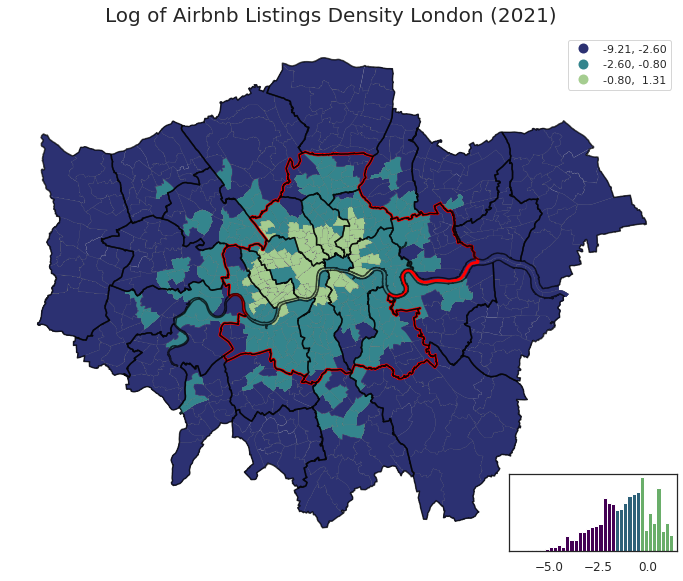

In [244]:
## plot the listings density on a london map

import pysal as ps
# https://github.com/pysal/mapclassify
import mapclassify as mc
# https://jiffyclub.github.io/palettable/
import palettable.matplotlib as palmpl
from legendgram import legendgram

f,ax = plt.subplots(figsize=(12,10))

f.suptitle('Log of Airbnb Listings Density London (2021)', y=0.9,ha='center', size=20)

boros.boundary.plot(ax = ax, color = "black", alpha = 0.7)
joined_wards.plot(column='ln_listings_density', scheme='naturalbreaks', cmap='crest_r',edgecolor='grey',linewidth=0.1, k=3, ax=ax, legend=True)
q = mc.Quantiles(joined_wards.ln_listings_density.values, k=3)
#set the axis off
ax.set_axis_off()

# add the inner london boundary 
gpd.GeoSeries(boros_il.unary_union).plot(ax=ax, edgecolor="red", facecolor="none", linewidth=3)

# https://github.com/pysal/legendgram/blob/master/legendgram/legendgram.py
legendgram(f, ax, 
               joined_wards.ln_listings_density, q.bins, pal=palmpl.Viridis_3,
               legend_size=(.25,.15), # legend size in fractions of the axis
               loc = 'lower right', # mpl-style legend loc
               clip = (-7,1.5), # clip range of the histogram
               frameon=True)
plt.savefig("Airbnb_density.png", bbox_inches = 'tight')

#https://github.com/pysal/legendgram

COLORS!!!

Now the census data will be added to the previous dataframe in order to create a complete dataframe that will be used in the clustering

In [63]:
#merge the census data with the previously joined dataframe file 
London_profiles = pd.merge( joined_wards, ward_data ,left_on = "GSS_CODE", right_on = "Ward code", how = "left")

In [64]:
# check it is still a geodataframe
type(London_profiles)

geopandas.geodataframe.GeoDataFrame

In [65]:
London_profiles.tail(5)

name  \
13695  A Magnificent Studio Apartment London Tower Br...   
13696                    Upmarket Tower of London Studio   
13697                    Upmarket Tower of London Studio   
13698   Superior One Bedroom Apartment in City of London   
13699   Superior One Bedroom Apartment in City of London   

                    property_type        room_type    price  availability_365  \
13695  Entire condominium (condo)  Entire home/apt   $70.00              34.0   
13696          Entire rental unit  Entire home/apt  $120.00             337.0   
13697          Entire rental unit  Entire home/apt  $120.00             337.0   
13698          Entire rental unit  Entire home/apt  $110.00             216.0   
13699          Entire rental unit  Entire home/apt  $110.00             216.0   

       number_of_reviews_l30d first_review last_review            NAME  \
13695                     2.0   2021-09-20  2021-09-26  City of London   
13696                     2.0   2016-05-17  2021-09-05  City of London   
13697                     2.0   2016-05-17  2021-09-05  City of London   
13698                     0.0   2020-09-06  2020-10-31  City of London   
13699                     0.0   2020-09-06  2020-10-31  City of London   

        GSS_CODE  ...  ln_listings_density       Ward name  Ward code  \
13695  E09000001  ...            -1.098431  City of London  E09000001   
13696  E09000001  ...            -1.098431  City of London  E09000001   
13697  E09000001  ...            -1.098431  City of London  E09000001   
13698  E09000001  ...            -1.098431  City of London  E09000001   
13699  E09000001  ...            -1.098431  City of London  E09000001   

      Median Age  Pop density BAME perc  Median income  Flat perc  \
13695       39.0       2538.1      21.4        63620.0       98.0   
13696       39.0       2538.1      21.4        63620.0       98.0   
13697       39.0       2538.1      21.4        63620.0       98.0   
13698       39.0       2538.1      21.4        63620.0       98.0   
13699       39.0       2538.1      21.4        63620.0       98.0   

       High educ perc Transport  
13695            68.4       7.9  
13696            68.4       7.9  
13697            68.4       7.9  
13698            68.4       7.9  
13699            68.4       7.9  

[5 rows x 28 columns]

In [66]:
#drop the dupicate entries for each ward
London_profiles.drop_duplicates(subset="GSS_CODE", inplace=True)
#drop the columns no longer needed
London_profiles.drop(columns=["Ward name", "Ward code","NONLD_AREA","POLY_ID","name","property_type","room_type","price","availability_365","number_of_reviews_l30d","first_review","last_review"], inplace=True)
London_profiles

NAME   GSS_CODE  HECTARES  LB_GSS_CD  \
0           Chessington South  E05000405   755.173  E09000021   
8      Tolworth and Hook Rise  E05000414   259.464  E09000021   
13                 Berrylands  E05000401   145.390  E09000021   
21                  Alexandra  E05000400   268.506  E09000021   
24                   Beverley  E05000402   187.821  E09000021   
...                       ...        ...       ...        ...   
13481               Whalebone  E05000042   155.399  E09000002   
13483               Eastbrook  E05000030   345.060  E09000002   
13486          Chadwell Heath  E05000029   338.422  E09000002   
13488                Parsloes  E05000037   124.384  E09000002   
13490          City of London  E09000001   314.943  E09000001   

                    BOROUGH  \
0      Kingston upon Thames   
8      Kingston upon Thames   
13     Kingston upon Thames   
21     Kingston upon Thames   
24     Kingston upon Thames   
...                     ...   
13481  Barking and Dagenham   
13483  Barking and Dagenham   
13486  Barking and Dagenham   
13488  Barking and Dagenham   
13490        City of London   

                                                geometry  listings_count  \
0      POLYGON ((516401.600 160201.800, 516407.300 16...               8   
8      POLYGON ((517829.600 165447.100, 517837.100 16...               5   
13     POLYGON ((518107.500 167303.400, 518114.300 16...               8   
21     POLYGON ((520480.000 166909.800, 520490.700 16...               3   
24     POLYGON ((522071.000 168144.900, 522063.900 16...               6   
...                                                  ...             ...   
13481  POLYGON ((549410.700 187450.700, 549391.200 18...               2   
13483  POLYGON ((549991.500 184928.500, 549988.900 18...               3   
13486  POLYGON ((547715.200 187914.200, 547712.500 18...               2   
13488  POLYGON ((547381.600 185753.600, 547377.500 18...               2   
13490  POLYGON ((531361.300 180691.000, 531313.200 18...             105   

       listings_density  ln_listings_density  Median Age  Pop density  \
0              0.010594            -4.547505        37.0       1375.0   
8              0.019270            -3.949180        36.0       3961.5   
13             0.055024            -2.899978        36.0       6466.7   
21             0.011173            -4.494261        39.0       3537.0   
24             0.031945            -3.443730        37.0       5447.4   
...                 ...                  ...         ...          ...   
13481          0.012870            -4.352849        34.0       6781.3   
13483          0.008694            -4.745106        36.0       3028.6   
13486          0.005910            -5.131146        34.0       2985.3   
13488          0.016079            -4.130226        33.0       8250.0   
13490          0.333394            -1.098431        39.0       2538.1   

       BAME perc  Median income  Flat perc  High educ perc  Transport  
0           13.0        38310.0       20.9            25.3        2.4  
8           27.2        37840.0       22.0            30.0        2.3  
13          18.1        42330.0       54.7            48.4        2.8  
21          29.8        41390.0       12.0            32.7        2.2  
24          32.6        40700.0       30.4            41.7        2.8  
...          ...            ...        ...             ...        ...  
13481       44.0        37180.0       27.8            22.4        2.9  
13483       24.8        37400.0       18.4            18.5        2.3  
13486       37.9        33920.0       34.5            19.5        2.3  
13488       30.9        31860.0       12.6            16.0        2.7  
13490       21.4        63620.0       98.0            68.4        7.9  

[625 rows x 16 columns]

In [69]:
London_profiles.isna().sum()

NAME                   0
GSS_CODE               0
HECTARES               0
LB_GSS_CD              0
BOROUGH                0
geometry               0
listings_count         0
listings_density       0
ln_listings_density    0
Median Age             0
Pop density            0
BAME perc              0
Median income          0
Flat perc              0
High educ perc         0
Transport              0
dtype: int64

# CSR

KEEP??? TEXT here

In [71]:
London_profiles = London_profiles.reset_index(drop=True)

In [72]:
#import the necessary packages
from libpysal import weights

#calculate the weights matrix
wr = weights.contiguity.Rook.from_dataframe(London_profiles)

w_queen = weights.contiguity.Queen.from_dataframe(London_profiles)

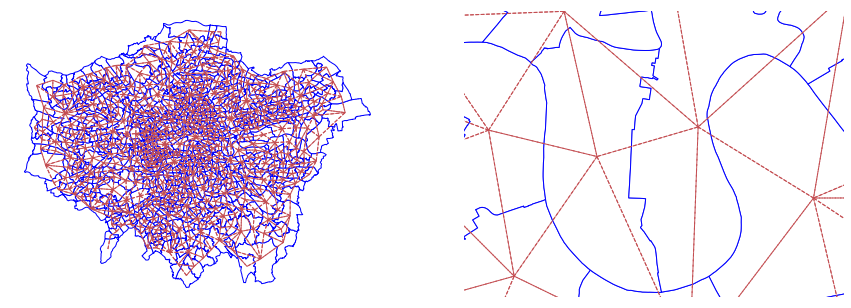

In [73]:
# code from Philip Wilkinson
#looking at London
fig, ax = plt.subplots(1,2, figsize = (15,15))

London_profiles.plot(edgecolor = "blue", facecolor = "w", ax=ax[0])

wr.plot(London_profiles, ax=ax[0],
       edge_kws=dict(color="r", linestyle = "--", linewidth =1),
       node_kws=dict(marker=''))

ax[0].set_axis_off()


#Second plot looking into deepr depth
London_profiles.plot(edgecolor = "blue", facecolor = "w", ax=ax[1])

wr.plot(London_profiles, ax=ax[1],
       edge_kws=dict(color="r", linestyle = "--", linewidth =1),
       node_kws=dict(marker=''))
#zzoming ino Canary Wharf
ax[1].axis([536_000, 540_000, 178_000, 181_000])

ax[1].set_axis_off()

RIVER IS IGNORED IN THIS SPATIAL WEIGHTS MATRIX!
a natural geographic boundary shoudnt be ingored!


# Hierarchical Clustering - listings density , checking for CSR


test hierarchical clustering on the lisitngs density column only

In [74]:
list=["GSS_CODE",
     "ln_listings_density"]

In [75]:
# subset the data
list_clust= London_profiles[list]
list_clust.set_index("GSS_CODE", inplace=True)
list_clust


ln_listings_density
GSS_CODE                      
E05000405            -4.547505
E05000414            -3.949180
E05000401            -2.899978
E05000400            -4.494261
E05000402            -3.443730
...                        ...
E05000042            -4.352849
E05000030            -4.745106
E05000029            -5.131146
E05000037            -4.130226
E09000001            -1.098431

[625 rows x 1 columns]

In [76]:
#import the necessary module
from sklearn.cluster import AgglomerativeClustering

#create the model setting the number of clusters 
model = AgglomerativeClustering(linkage="ward", 
                                #define the connectivity
                                connectivity = wr.sparse,
                                distance_threshold = 4 , 
                                n_clusters=None)
#fit the model to the data
model.fit(list_clust)


AgglomerativeClustering(connectivity=<625x625 sparse matrix of type '<class 'numpy.float64'>'
	with 3540 stored elements in Compressed Sparse Row format>,
                        distance_threshold=4, n_clusters=None)

In [77]:
# add the cluster membership back to the dataframe
list_clust["Aggl_clus"] = model.labels_


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [78]:
# reset the index in order to join with the shapefile on the MSOA code
list_clust.reset_index(inplace=True)
# join the dataframe to the geodataframe (Note: the geopandas dataframe needs to be the left, so that the resulting objects remains a geodataframe)
list_clust_joined= pd.merge(London_profiles, list_clust, left_on="GSS_CODE", right_on="GSS_CODE" )
#check the result
list_clust_joined.head()

NAME   GSS_CODE  HECTARES  LB_GSS_CD  \
0       Chessington South  E05000405   755.173  E09000021   
1  Tolworth and Hook Rise  E05000414   259.464  E09000021   
2              Berrylands  E05000401   145.390  E09000021   
3               Alexandra  E05000400   268.506  E09000021   
4                Beverley  E05000402   187.821  E09000021   

                BOROUGH                                           geometry  \
0  Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...   
1  Kingston upon Thames  POLYGON ((517829.600 165447.100, 517837.100 16...   
2  Kingston upon Thames  POLYGON ((518107.500 167303.400, 518114.300 16...   
3  Kingston upon Thames  POLYGON ((520480.000 166909.800, 520490.700 16...   
4  Kingston upon Thames  POLYGON ((522071.000 168144.900, 522063.900 16...   

   listings_count  listings_density  ln_listings_density_x  Median Age  \
0               8          0.010594              -4.547505        37.0   
1               5          0.019270              -3.949180        36.0   
2               8          0.055024              -2.899978        36.0   
3               3          0.011173              -4.494261        39.0   
4               6          0.031945              -3.443730        37.0   

   Pop density  BAME perc  Median income  Flat perc  High educ perc  \
0       1375.0       13.0        38310.0       20.9            25.3   
1       3961.5       27.2        37840.0       22.0            30.0   
2       6466.7       18.1        42330.0       54.7            48.4   
3       3537.0       29.8        41390.0       12.0            32.7   
4       5447.4       32.6        40700.0       30.4            41.7   

   Transport  ln_listings_density_y  Aggl_clus  
0        2.4              -4.547505          9  
1        2.3              -3.949180          9  
2        2.8              -2.899978          4  
3        2.2              -4.494261          9  
4        2.8              -3.443730          4

In [79]:
print(type(list_clust_joined))

<class 'geopandas.geodataframe.GeoDataFrame'>


<AxesSubplot:>

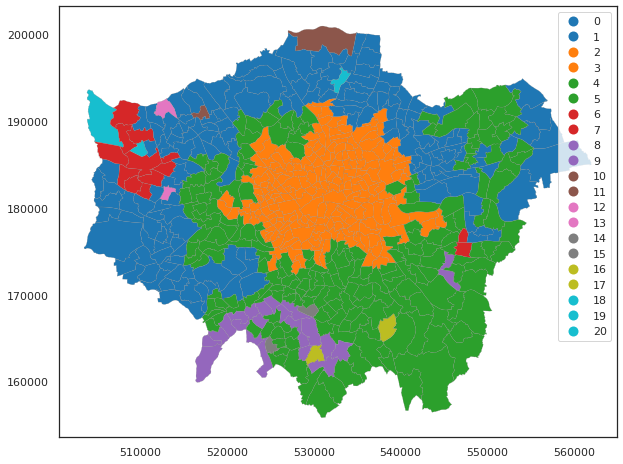

In [220]:
# map the clusters

list_clust_joined.plot(column='Aggl_clus',categorical = True, legend=True,
          edgecolor='grey',linewidth=0.2, figsize=(10,8));


#ax.set_axis_off()

In [82]:
# check the size of each cluster
agglom_sizes = list_clust_joined.groupby("Aggl_clus").size()
agglom_sizes

Aggl_clus
0       7
1     157
2      98
3     114
4     127
5      75
6      11
7       2
8       2
9      21
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
dtype: int64

Dendogram

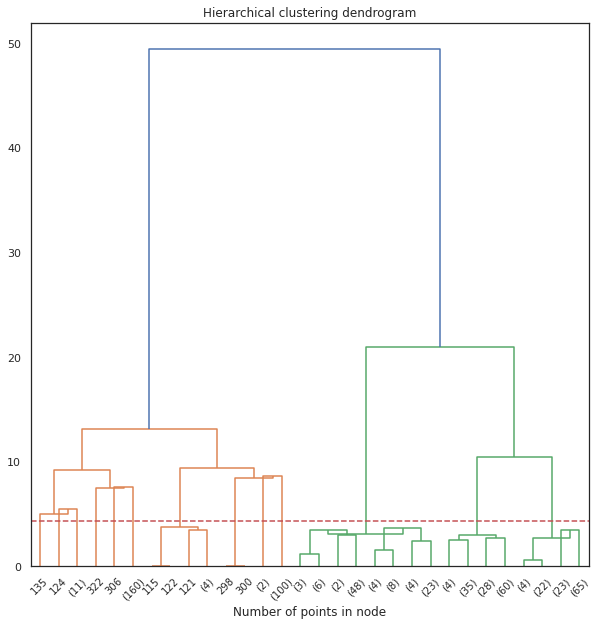

In [83]:
# the code below was copied from Philip Wilkinson: https://github.com/PhilipDW183/London_crime_clusters/blob/main/London_Crime.ipynb 

import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.axhline(y = 4.3, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

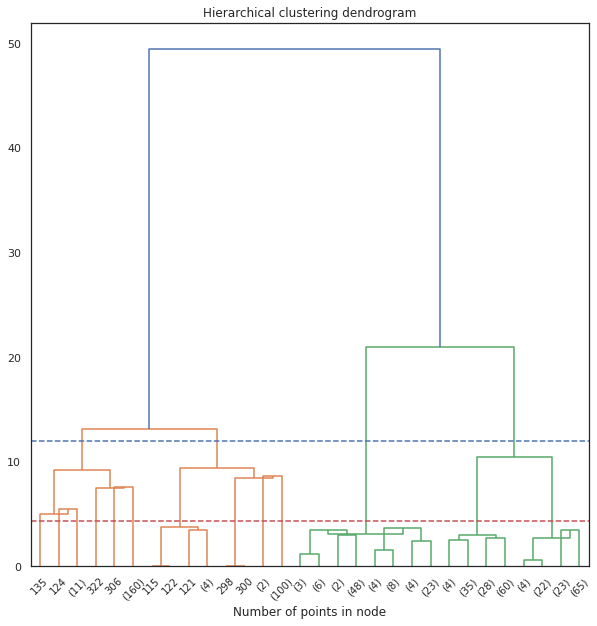

In [84]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.axhline(y = 4.3, color = "r", linestyle = "--")
plt.axhline(y = 12, color = "b", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

The dendogram shows that at a slightly larger distance that the current(4), we would have one less cluster (7 and 8 should merge)
However the longest distances seem to be occur around 21, which would result into 3 clusters


In [85]:
# subset the data
list_clust= London_profiles[list]
list_clust.set_index("GSS_CODE", inplace=True)
list_clust

ln_listings_density
GSS_CODE                      
E05000405            -4.547505
E05000414            -3.949180
E05000401            -2.899978
E05000400            -4.494261
E05000402            -3.443730
...                        ...
E05000042            -4.352849
E05000030            -4.745106
E05000029            -5.131146
E05000037            -4.130226
E09000001            -1.098431

[625 rows x 1 columns]

In [86]:
#Repeat the process with distance=12
model_12 = AgglomerativeClustering(linkage="ward", 
                                   #define the connectivity
                                   connectivity = wr.sparse,
                                   distance_threshold = 12 , n_clusters=None)
#fit the model to the data
model_12.fit(list_clust)

AgglomerativeClustering(connectivity=<625x625 sparse matrix of type '<class 'numpy.float64'>'
	with 3540 stored elements in Compressed Sparse Row format>,
                        distance_threshold=12, n_clusters=None)

In [87]:
# add the cluster membership back to the dataframe
list_clust_joined["Aggl_clus_12"] = model_12.labels_

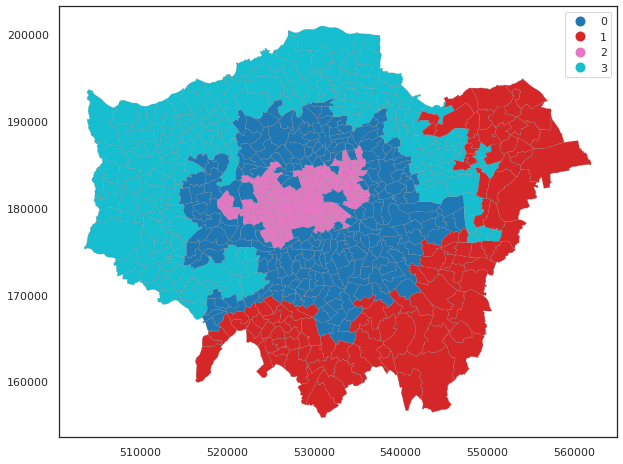

In [96]:
# map the clusters

list_clust_joined.plot(column='Aggl_clus_12',categorical = True, legend=True,
          edgecolor='grey',linewidth=0.2, figsize=(10,8));

ax.set_axis_off()

add morans I?

## data preparation for k-means

In [99]:
# extract the column names 
cols_profiles=London_profiles.columns
print(cols_profiles)


Index(['NAME', 'GSS_CODE', 'HECTARES', 'LB_GSS_CD', 'BOROUGH', 'geometry',
       'listings_count', 'listings_density', 'ln_listings_density',
       'Median Age', 'Pop density', 'BAME perc', 'Median income', 'Flat perc',
       'High educ perc', 'Transport'],
      dtype='object')


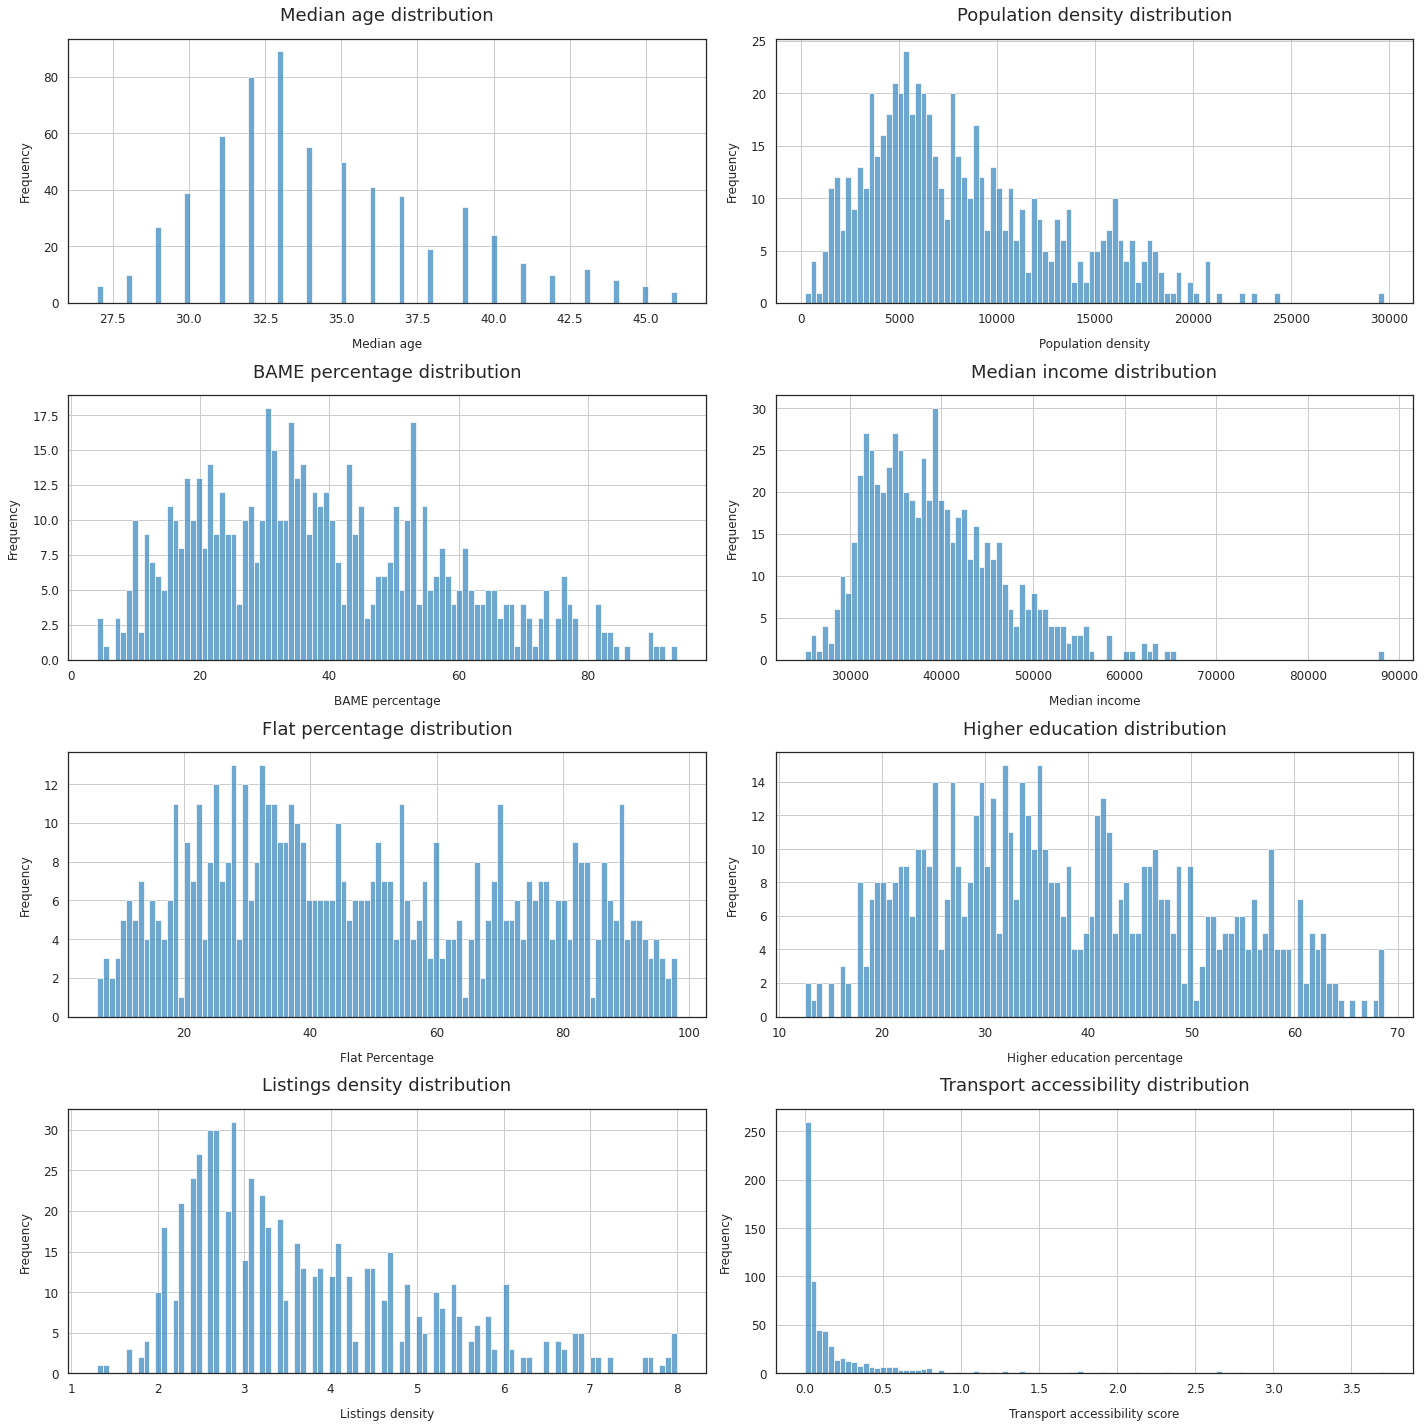

In [249]:
# code below from Philip Wilkinson : https://github.com/PhilipDW183/Convenience_store/blob/main/Convenience%20store%20exploration.ipynb

#set the columns we are interested in
columns = ['Median Age', 
           'Pop density', 
           'BAME perc',
           'Median income',
           'Flat perc', 
           'High educ perc', 
           'Transport',
           'listings_density']

#set the histogram titles
hist_titles = ["Median age distribution",
              "Population density distribution",
              "BAME percentage distribution",
              "Median income distribution",
              "Flat percentage distribution",
              "Higher education distribution",
              "Listings density distribution",
              "Transport accessibility distribution" ]
#set the acis labels
axis_labels = ["Median age", 
              "Population density",
              "BAME percentage",
              "Median income",
              "Flat Percentage",
              "Higher education percentage",
              "Listings density",
              "Transport accessibility score"]

#create a base axis for teh plots
fig, ax = plt.subplots(4,2, figsize = (20,20))
#flatten the axis to make it easy to iteratre over
axis = ax.flatten()

#iterate over each columns using the labels information already set up
for i, col in enumerate(columns):
    
    #create the histogram using the column
    London_profiles[col].hist(bins = 100, ax = axis[i],
                                       color = "#3182bd",
                                       alpha = 0.7)
    #add label information
    axis[i].set_title(hist_titles[i], fontsize = 18, pad = 18)
    axis[i].set_ylabel("Frequency", fontsize  =12, labelpad = 12)
    axis[i].set_xlabel(f"{axis_labels[i]}", fontsize = 12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12)

#remove the unused axis
#axis[5].set_axis_off()
#keep the layout tight
plt.tight_layout()
#show the plot 
plt.show()

The distributions above show that the the variables have different distributions (Population, education, listings, transport are heavily skewed for example) and they also have different range and units. the data will need to be scaled ie standardised. 


For comleteness lets, also plot the variation of these variables across the London Wards.

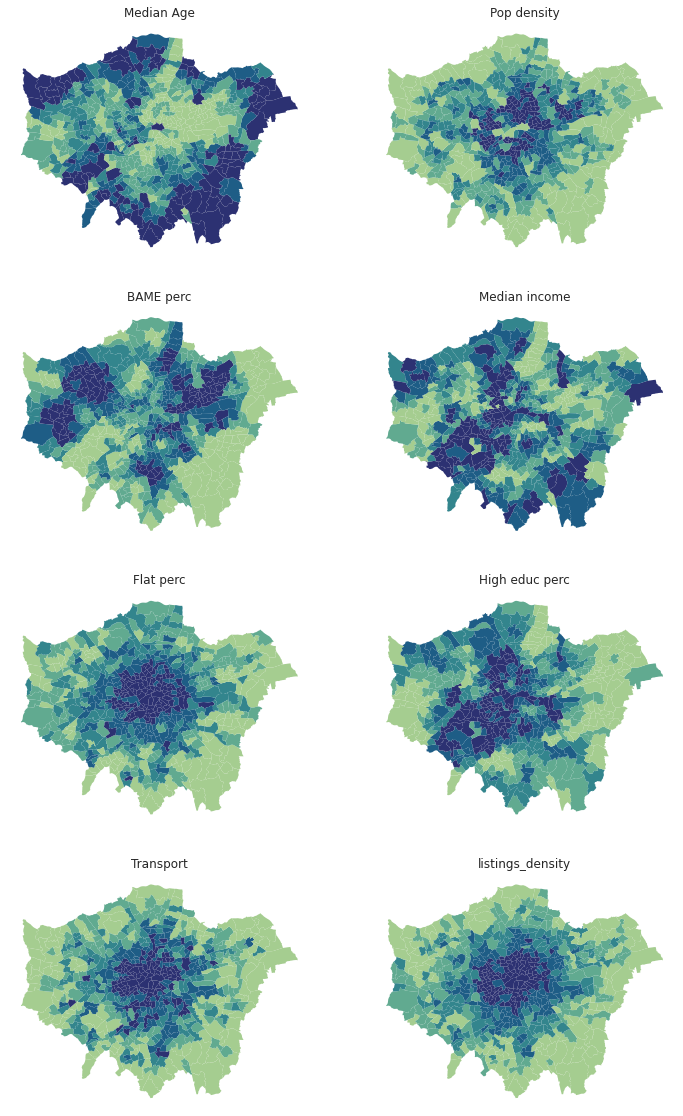

In [222]:
f, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(columns):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    London_profiles.plot(
        column=col, 
        ax=ax,
        scheme='Quantiles', 
        linewidth=0,
        cmap="crest"
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

#RdPu

In [147]:
# create a dataframe with the variables

clustA=London_profiles[colsA]
clustA

Median Age  Pop density  BAME perc  Median income  Flat perc  \
0         37.00     1,375.00      13.00      38,310.00      20.90   
1         36.00     3,961.50      27.20      37,840.00      22.00   
2         36.00     6,466.70      18.10      42,330.00      54.70   
3         39.00     3,537.00      29.80      41,390.00      12.00   
4         37.00     5,447.40      32.60      40,700.00      30.40   
..          ...          ...        ...            ...        ...   
620       34.00     6,781.30      44.00      37,180.00      27.80   
621       36.00     3,028.60      24.80      37,400.00      18.40   
622       34.00     2,985.30      37.90      33,920.00      34.50   
623       33.00     8,250.00      30.90      31,860.00      12.60   
624       39.00     2,538.10      21.40      63,620.00      98.00   

     High educ perc  Transport  listings_density  
0             25.30       2.40              0.01  
1             30.00       2.30              0.02  
2             48.40       2.80              0.06  
3             32.70       2.20              0.01  
4             41.70       2.80              0.03  
..              ...        ...               ...  
620           22.40       2.90              0.01  
621           18.50       2.30              0.01  
622           19.50       2.30              0.01  
623           16.00       2.70              0.02  
624           68.40       7.90              0.33  

[625 rows x 8 columns]

#### Initialise the Scalers and Transformers

In [143]:
import sklearn
#from sklearn.neighbors import NearestNeighbors
#from sklearn.manifold import TSNE
#from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

import random
random.seed(42)    # For reproducibility
np.random.seed(42) # For reproducibility

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [144]:
# rbs = RobustScaler(quantile_range=[0.025,0.975])
mms = MinMaxScaler(feature_range=(-1,1))
pts = PowerTransformer(method='box-cox')

In [148]:
# Rescale the columns 
for c in clustA.columns:
    clustA[c] = pts.fit_transform(clustA[c].values.reshape(-1,1))
clustA.head(10)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Median Age  Pop density  BAME perc  Median income  Flat perc  \
0        0.76        -1.98      -1.56           0.04      -1.22   
1        0.53        -0.87      -0.52          -0.03      -1.16   
2        0.53        -0.20      -1.14           0.58       0.31   
3        1.16        -1.01      -0.36           0.47      -1.79   
4        0.76        -0.45      -0.20           0.38      -0.72   
5        0.02        -1.44      -0.04           0.96      -0.19   
6        0.97        -0.65      -1.38          -0.13      -1.44   
7        0.29        -0.22      -1.07           0.68       0.42   
8        1.34        -0.47      -0.30           0.51      -1.36   
9       -1.27         0.10      -0.90           0.89       0.85   

   High educ perc  Transport  listings_density  
0           -0.96      -1.12             -0.90  
1           -0.52      -1.26             -0.61  
2            0.87      -0.63             -0.06  
3           -0.29      -1.41             -0.87  
4            0.41      -0.63             -0.35  
5            0.61      -0.99             -0.58  
6           -1.21      -1.12             -0.91  
7            1.11      -0.14             -0.14  
8           -0.15      -0.75             -0.54  
9            0.86       0.19              0.20

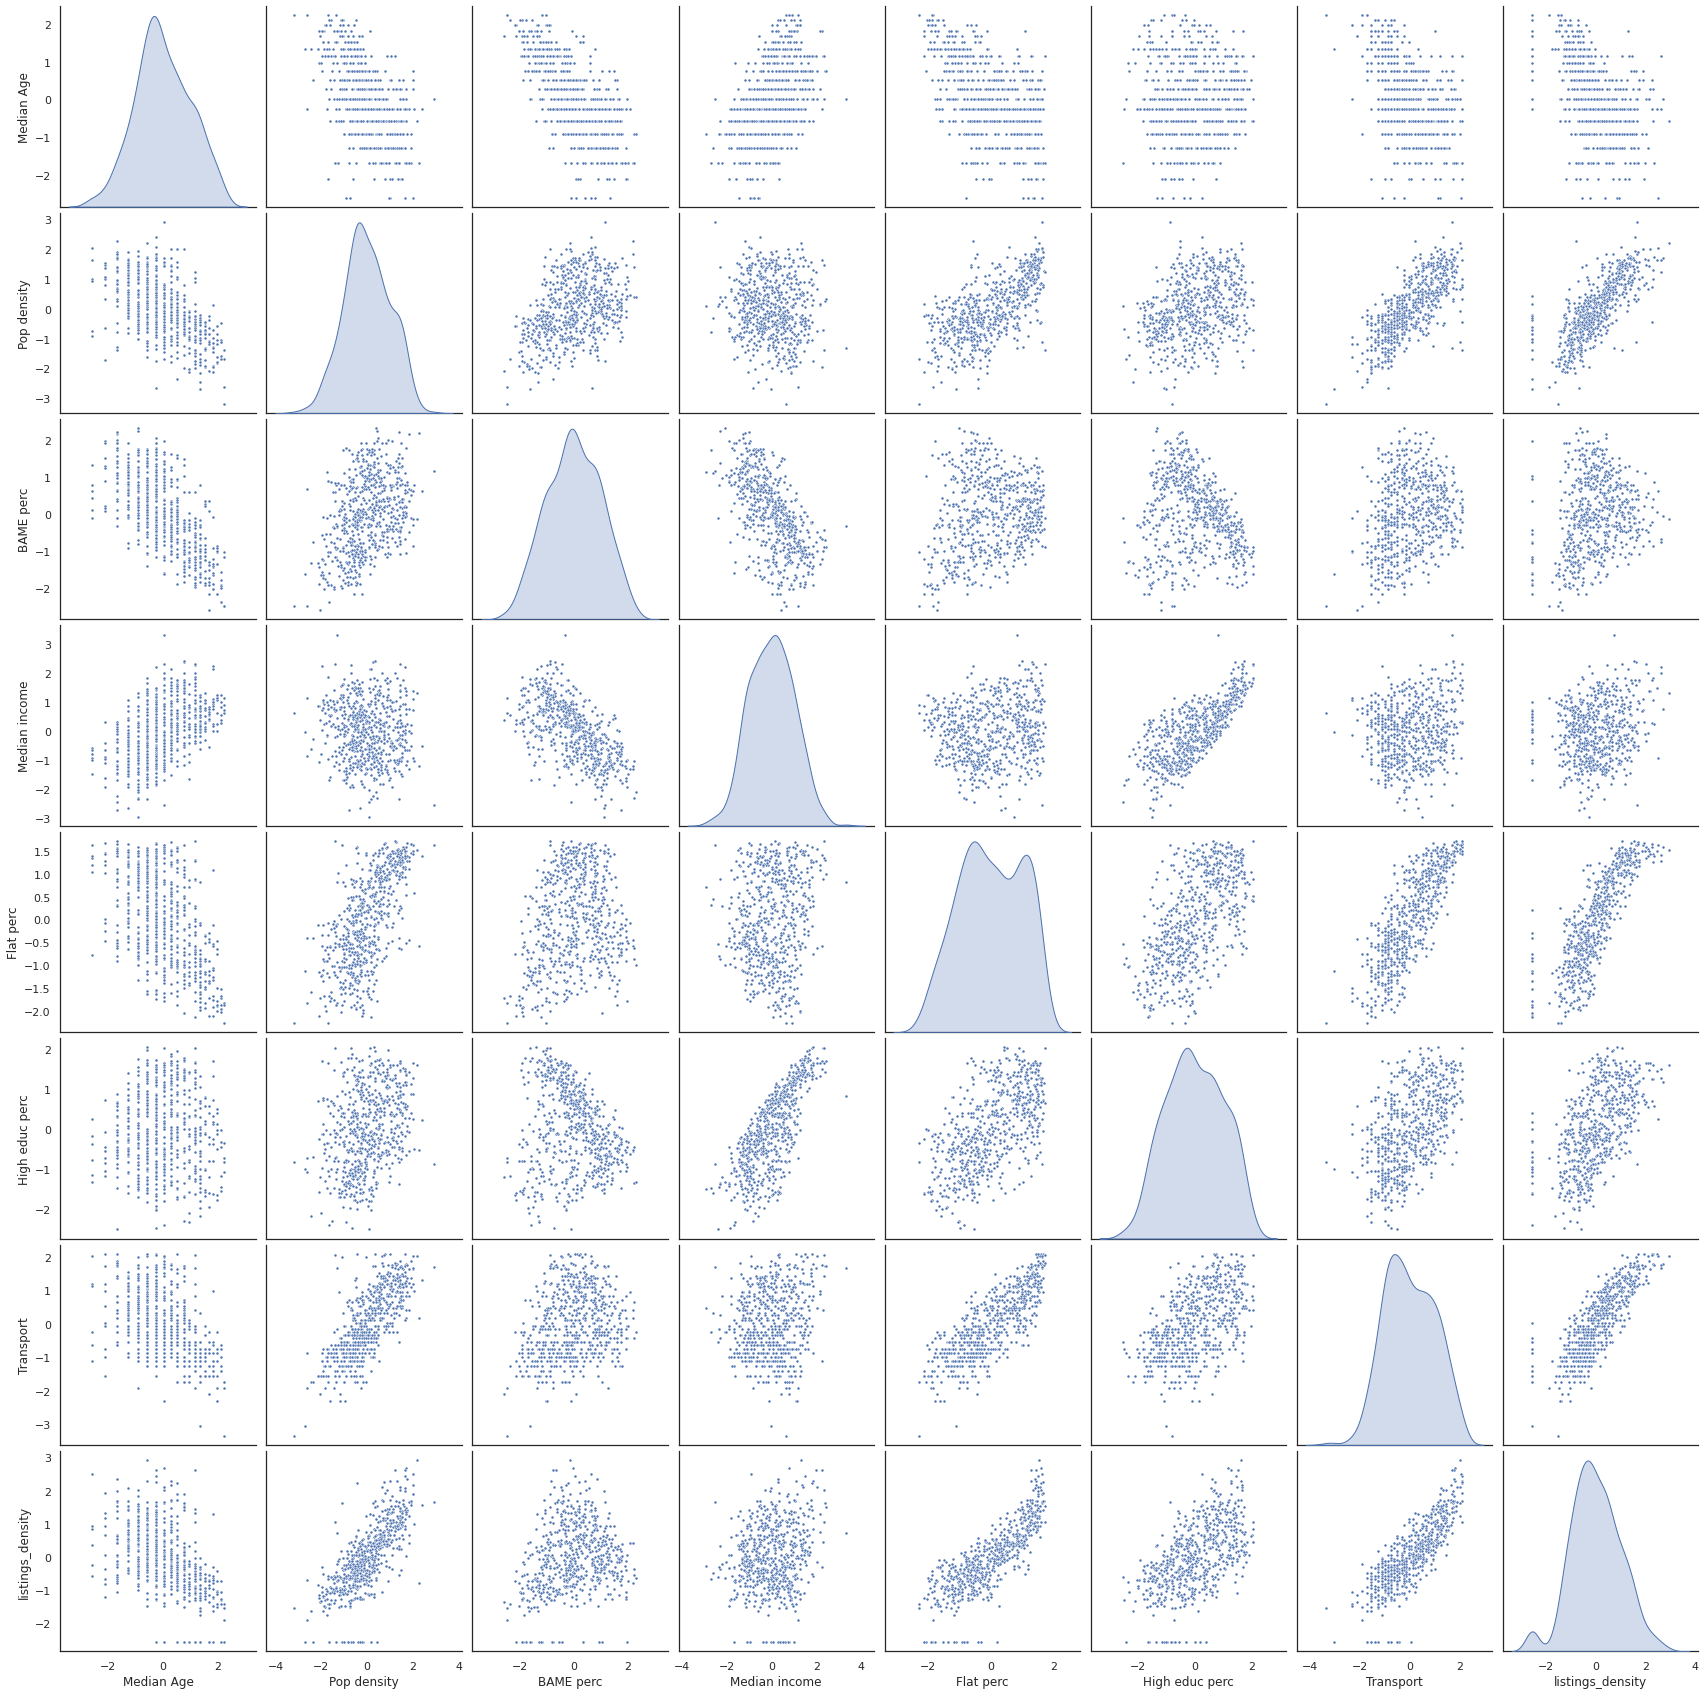

In [124]:
# quick plot to visualise the results
sns.set(style="white")
sns.pairplot(clustA, markers=".", height=3, diag_kind='kde');

In [164]:
clustA.describe()

Median Age  Pop density  BAME perc  Median income  Flat perc  \
count      625.00       625.00     625.00         625.00     625.00   
mean        -0.00        -0.00       0.00          -0.00      -0.00   
std          1.00         1.00       1.00           1.00       1.00   
min         -2.59        -3.19      -2.60          -2.94      -2.27   
25%         -0.57        -0.65      -0.75          -0.76      -0.77   
50%          0.02        -0.06      -0.01           0.02      -0.03   
75%          0.76         0.69       0.77           0.72       0.90   
max          2.23         2.92       2.33           3.35       1.72   

       High educ perc  Transport  listings_density  
count          625.00     625.00            625.00  
mean            -0.00       0.00              0.00  
std              1.00       1.00              1.00  
min             -2.50      -3.34             -2.57  
25%             -0.77      -0.75             -0.66  
50%             -0.06      -0.05             -0.06  
75%              0.78       0.78              0.66  
max              2.06       2.09              2.93

In [149]:
#import the necessary libraries
from sklearn import metrics
from sklearn.cluster import KMeans

#create an empty list
list_SSE = []
#set the range of clusters to evaluate
min_k = 1
max_k = 11
range_k = range(min_k, max_k)

In [151]:
#iterate over the range
for i in range_k:
    #perform the clustering algorithm
    km = KMeans(n_clusters = i,
               init = "random",
               n_init = 10,
               max_iter = 300,
               tol = 1e-04, 
               random_state = 42)
    #fit this to the data
    km.fit(clustA[columns])
    #add the SEE score
    list_SSE.append(km.inertia_)   

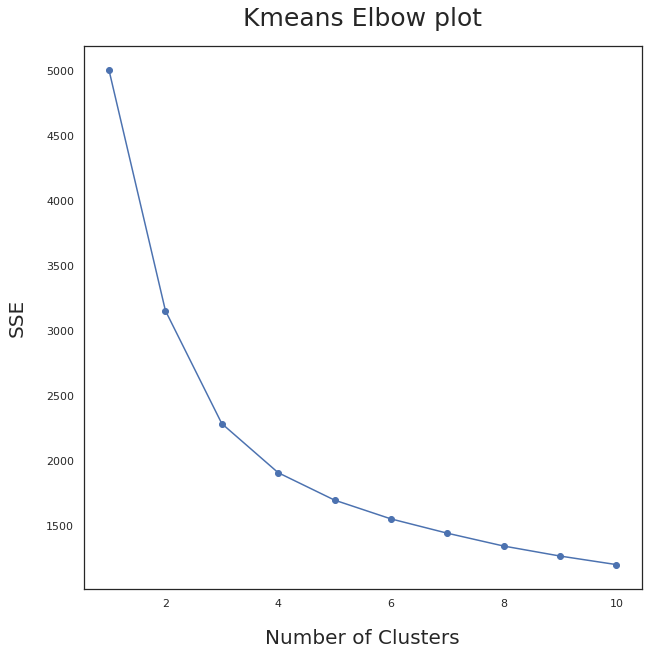

In [152]:
#create the base plots
fig, ax = plt.subplots(1,1, figsize = (10,10))

#add the data to the axis
ax.plot(range_k, list_SSE, marker = "o")

#add the necessary labels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("SSE", fontsize =20, labelpad = 20)
ax.set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)

plt.show()



In [153]:
#for the silhouette score
import random

#create an empty list
silhouette = []

#iteratre over the number of clusters to evaluate
for i in range(2,11):
    
    #create an empty list to hold the averages
    average = []
    #perform the clustering algorithm several times for each number of clusters
    for x in range(1,10):
        #set the number of clusters
        k_cluster = i
        #generate a arandom seed number
        random_seed = random.randint(1,101)
        #apply the KMeans clustering algorithm
        kmeans_method = KMeans(n_clusters = k_cluster,
                              random_state = random_seed)
        kmeans_method.fit(clustA[columns])
        #extract the labels
        labels = kmeans_method.labels_
        #extract the silhouette score
        a = metrics.silhouette_score(clustA[columns], labels)
        #append the result
        average.append(a)
    #calculate the average silhouette score for each number of clusters 
    silhouette.append(sum(average)/len(average))



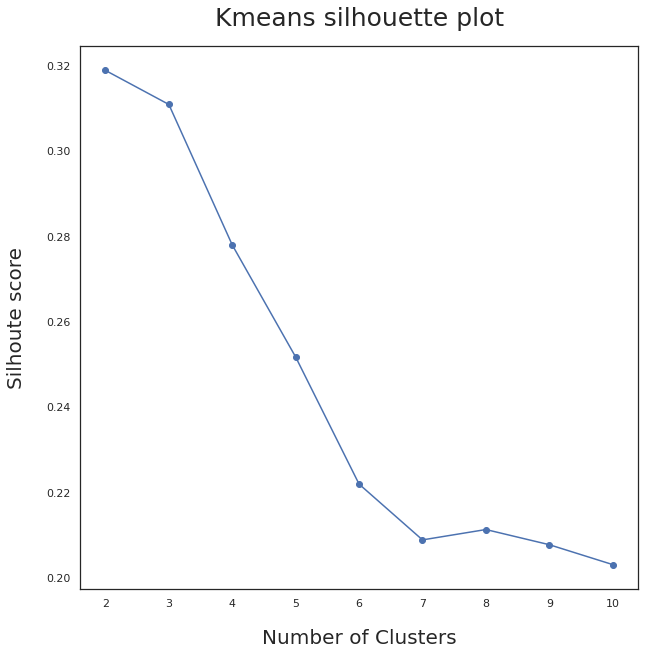

In [154]:
#create a base axis
fig, ax = plt.subplots(1,1, figsize = (10,10))

#plot the results
ax.plot(range(2,11), silhouette, marker = "o")

#add the lbels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax.set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

plt.show()

Text(0.5, 1.0, 'Kmeans Elbow plot')

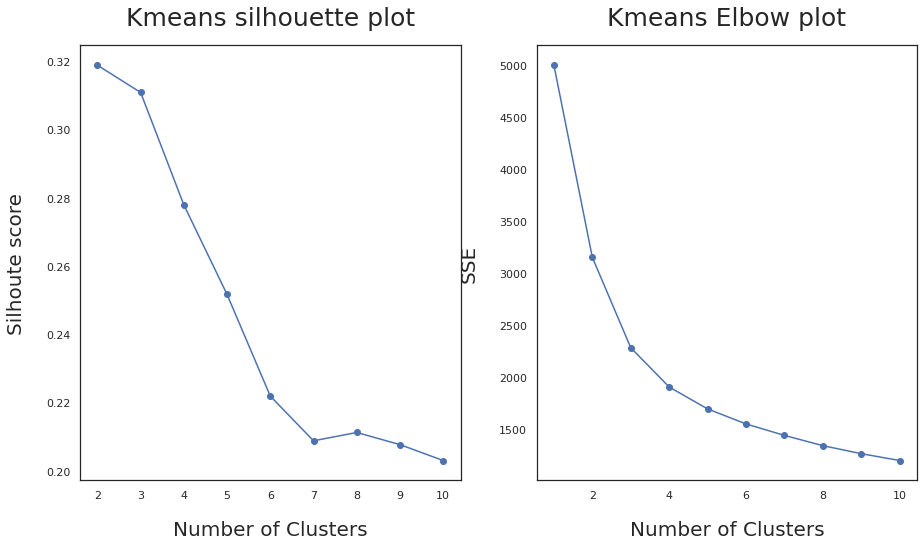

In [155]:


#combine both plots
fig, ax = plt.subplots(1,2, figsize = (15,8))

ax[0].plot(range(2,11), silhouette, marker = "o")
ax[0].set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax[0].set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax[0].set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

ax[1].plot(range_k, list_SSE, marker = "o")
ax[1].set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax[1].set_ylabel("SSE", fontsize =20, labelpad = 20)
ax[1].set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)



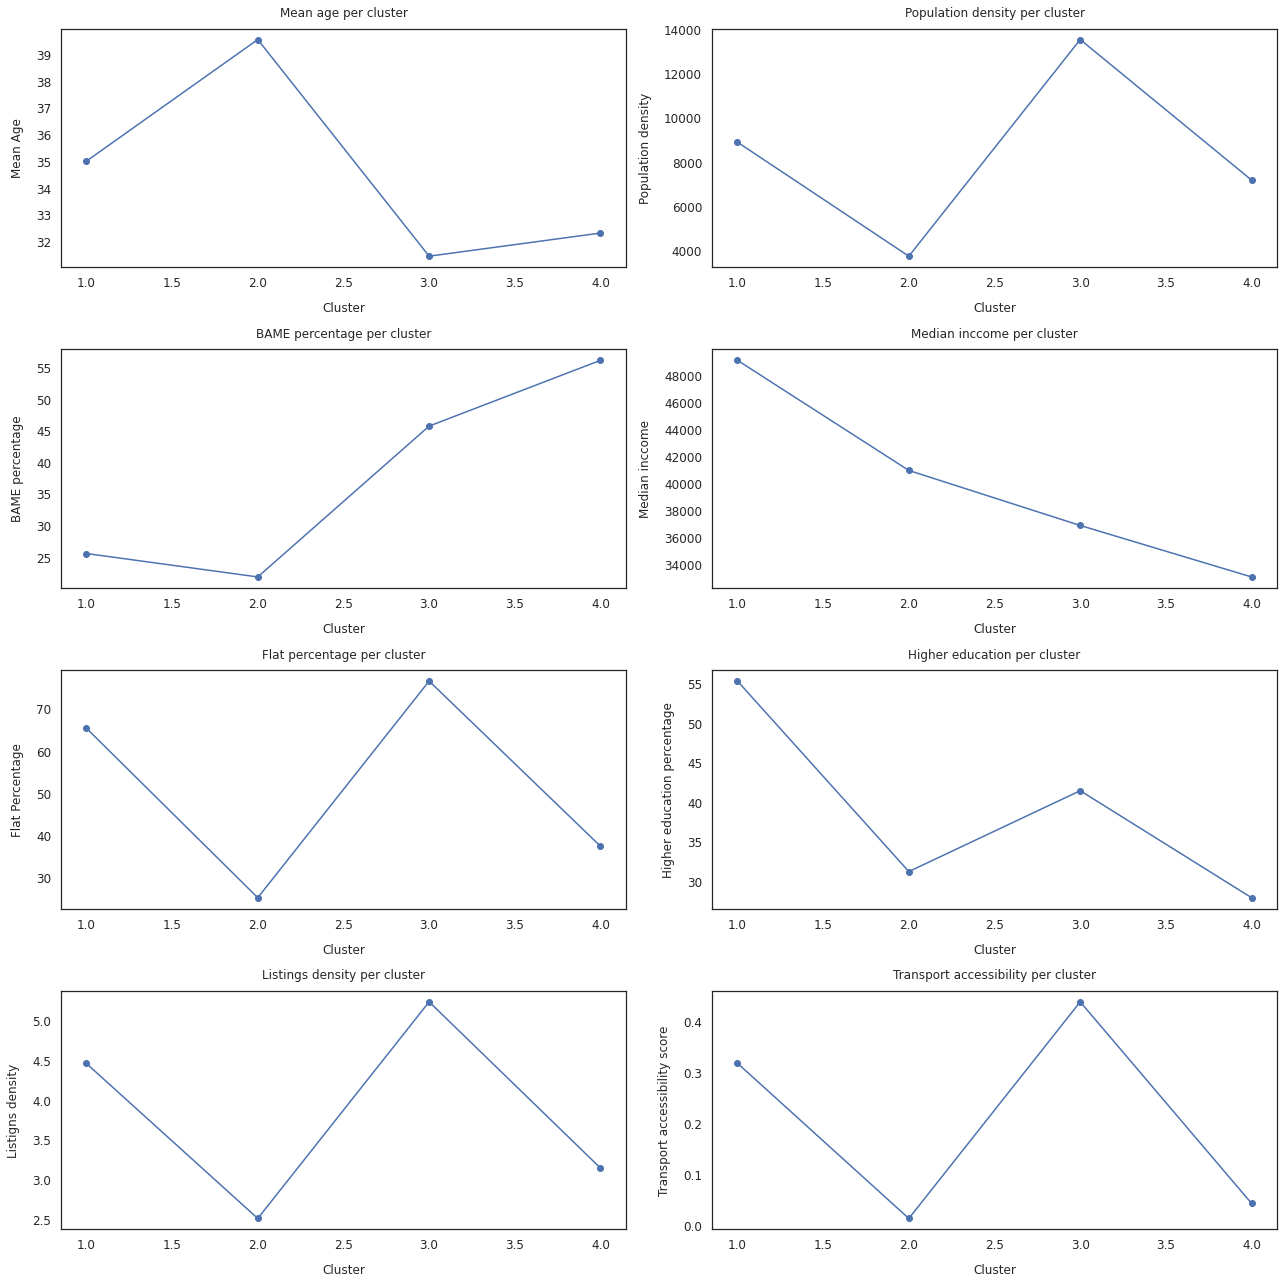

In [165]:
#perform the clustering with the chosen number of clusters
kmeans_method = KMeans(n_clusters = 4,
                        random_state = 22,
                      n_init = 10)
kmeans_method.fit(clustA[columns])


#creating plots for the results to understand the means


#set the titles
titles = [ "Mean age per cluster",
            "Population density per cluster",
            "BAME percentage per cluster",
            "Median inccome per cluster",
            "Flat percentage per cluster",
            "Higher education per cluster",
            "Listings density per cluster",
            "Transport accessibility per cluster" ]
#set the labels
ylabels = ["Mean Age", 
            "Population density",
            "BAME percentage",
            "Median inccome",
            "Flat Percentage",
            "Higher education percentage",
            "Listings density",
            "Transport accessibility score"]
#extract the cluster labels and add these back to the data
labels = kmeans_method.labels_
London_profiles["labels"] = labels
London_profiles["labels"] = London_profiles["labels"] + 1

#create a base plot
fig, ax = plt.subplots(4,2, figsize = (18,18))
#flatten the axis
axis = ax.flatten()

#iterate over each column to create plots for each 
for i, col in enumerate(columns):
    #create an empty dictionary
    col_dict = {}
     #iterate over each label
        
    for label in London_profiles["labels"].unique().tolist():
        #crete a new dataframe for each label
        label_df = London_profiles[London_profiles["labels"] == label]
        #add the mean to the dataframe
        col_dict[label] = label_df[col].mean()
    #convert the dictionary to a dataframe
    column_df = pd.DataFrame.from_dict(col_dict, orient = "index")
    #reset the index
    column_df.reset_index(inplace=True)
    #sort the values by the index
    column_df.sort_values(by = "index", inplace=True)

        #plot the results
    axis[i].plot(column_df["index"], column_df[0],
                marker = "o")
    
    #set the plots up
    axis[i].set_title(titles[i], fontsize = 12, pad = 12)
    axis[i].set_xlabel("Cluster", fontsize = 12, labelpad = 12)
    axis[i].set_ylabel(ylabels[i], fontsize =12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12)


#set the layout to tight so no overalp
plt.tight_layout()
 

In [166]:
#extract the number of wards within each clusterc 
London_profiles["labels"].value_counts()

4    186
2    158
3    155
1    126
Name: labels, dtype: int64

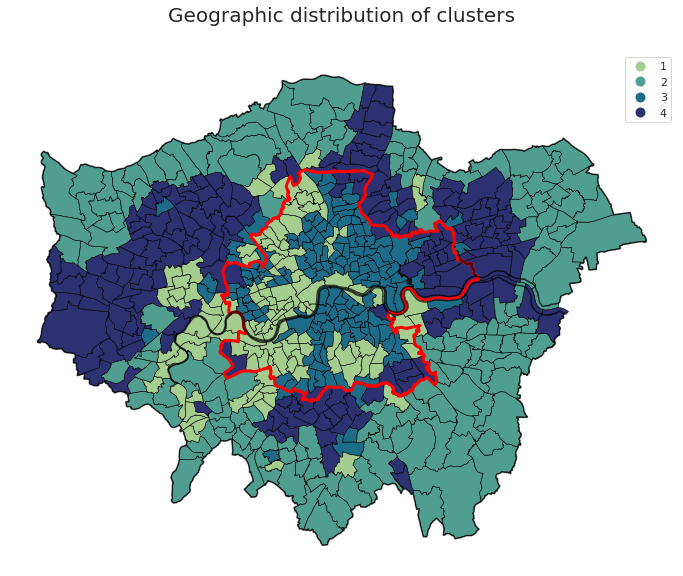

In [223]:
# map the clusters
fig, ax = plt.subplots(1,1, figsize = (12,12))

ldn_shape.boundary.plot(ax = ax, color = "black", alpha = 0.7)

London_profiles.plot(ax = ax,column='labels',categorical = True,cmap="crest", legend=True,
          edgecolor='black',linewidth=0.6, figsize=(10,8))

# add the inner london boundary 
gpd.GeoSeries(boros_il.unary_union).plot(ax=ax, edgecolor="red", facecolor="none", linewidth=3)

#set the title
ax.set_title("Geographic distribution of clusters", fontsize = 20,
            pad = 30)
ax.set_axis_off()

# repeat

In [185]:
London_profiles["ln_income"]= np.log(London_profiles["Median income"])
London_profiles["ln_listings"]=np.log(London_profiles["listings_density"])
London_profiles

NAME   GSS_CODE  HECTARES  LB_GSS_CD  \
0         Chessington South  E05000405    755.17  E09000021   
1    Tolworth and Hook Rise  E05000414    259.46  E09000021   
2                Berrylands  E05000401    145.39  E09000021   
3                 Alexandra  E05000400    268.51  E09000021   
4                  Beverley  E05000402    187.82  E09000021   
..                      ...        ...       ...        ...   
620               Whalebone  E05000042    155.40  E09000002   
621               Eastbrook  E05000030    345.06  E09000002   
622          Chadwell Heath  E05000029    338.42  E09000002   
623                Parsloes  E05000037    124.38  E09000002   
624          City of London  E09000001    314.94  E09000001   

                  BOROUGH                                           geometry  \
0    Kingston upon Thames  POLYGON ((516401.600 160201.800, 516407.300 16...   
1    Kingston upon Thames  POLYGON ((517829.600 165447.100, 517837.100 16...   
2    Kingston upon Thames  POLYGON ((518107.500 167303.400, 518114.300 16...   
3    Kingston upon Thames  POLYGON ((520480.000 166909.800, 520490.700 16...   
4    Kingston upon Thames  POLYGON ((522071.000 168144.900, 522063.900 16...   
..                    ...                                                ...   
620  Barking and Dagenham  POLYGON ((549410.700 187450.700, 549391.200 18...   
621  Barking and Dagenham  POLYGON ((549991.500 184928.500, 549988.900 18...   
622  Barking and Dagenham  POLYGON ((547715.200 187914.200, 547712.500 18...   
623  Barking and Dagenham  POLYGON ((547381.600 185753.600, 547377.500 18...   
624        City of London  POLYGON ((531361.300 180691.000, 531313.200 18...   

     listings_count  listings_density  ln_listings_density  Median Age  \
0                 8              0.01                -4.55       37.00   
1                 5              0.02                -3.95       36.00   
2                 8              0.06                -2.90       36.00   
3                 3              0.01                -4.49       39.00   
4                 6              0.03                -3.44       37.00   
..              ...               ...                  ...         ...   
620               2              0.01                -4.35       34.00   
621               3              0.01                -4.75       36.00   
622               2              0.01                -5.13       34.00   
623               2              0.02                -4.13       33.00   
624             105              0.33                -1.10       39.00   

     Pop density  BAME perc  Median income  Flat perc  High educ perc  \
0       1,375.00      13.00      38,310.00      20.90           25.30   
1       3,961.50      27.20      37,840.00      22.00           30.00   
2       6,466.70      18.10      42,330.00      54.70           48.40   
3       3,537.00      29.80      41,390.00      12.00           32.70   
4       5,447.40      32.60      40,700.00      30.40           41.70   
..           ...        ...            ...        ...             ...   
620     6,781.30      44.00      37,180.00      27.80           22.40   
621     3,028.60      24.80      37,400.00      18.40           18.50   
622     2,985.30      37.90      33,920.00      34.50           19.50   
623     8,250.00      30.90      31,860.00      12.60           16.00   
624     2,538.10      21.40      63,620.00      98.00           68.40   

     Transport  labels  ln_income  ln_listings  
0         2.40       2      10.55        -4.55  
1         2.30       2      10.54        -3.95  
2         2.80       1      10.65        -2.90  
3         2.20       2      10.63        -4.49  
4         2.80       2      10.61        -3.44  
..         ...     ...        ...          ...  
620       2.90       4      10.52        -4.35  
621       2.30       2      10.53        -4.75  
622       2.30       4      10.43        -5.13  
623       2.70       4      10.37        -4.13  


In [186]:
colsB=['Median Age', 
       'Pop density', 
       'BAME perc',
       'ln_income',
       'Flat perc', 
       'High educ perc', 
       'Transport',
       'ln_listings']

clustB=London_profiles[colsB]
clustB

Median Age  Pop density  BAME perc  ln_income  Flat perc  High educ perc  \
0         37.00     1,375.00      13.00      10.55      20.90           25.30   
1         36.00     3,961.50      27.20      10.54      22.00           30.00   
2         36.00     6,466.70      18.10      10.65      54.70           48.40   
3         39.00     3,537.00      29.80      10.63      12.00           32.70   
4         37.00     5,447.40      32.60      10.61      30.40           41.70   
..          ...          ...        ...        ...        ...             ...   
620       34.00     6,781.30      44.00      10.52      27.80           22.40   
621       36.00     3,028.60      24.80      10.53      18.40           18.50   
622       34.00     2,985.30      37.90      10.43      34.50           19.50   
623       33.00     8,250.00      30.90      10.37      12.60           16.00   
624       39.00     2,538.10      21.40      11.06      98.00           68.40   

     Transport  ln_listings  
0         2.40        -4.55  
1         2.30        -3.95  
2         2.80        -2.90  
3         2.20        -4.49  
4         2.80        -3.44  
..         ...          ...  
620       2.90        -4.35  
621       2.30        -4.75  
622       2.30        -5.13  
623       2.70        -4.13  
624       7.90        -1.10  

[625 rows x 8 columns]

In [187]:
# create a dataframe with the variables

clustB=London_profiles[colsA]
clustB

Median Age  Pop density  BAME perc  Median income  Flat perc  \
0         37.00     1,375.00      13.00      38,310.00      20.90   
1         36.00     3,961.50      27.20      37,840.00      22.00   
2         36.00     6,466.70      18.10      42,330.00      54.70   
3         39.00     3,537.00      29.80      41,390.00      12.00   
4         37.00     5,447.40      32.60      40,700.00      30.40   
..          ...          ...        ...            ...        ...   
620       34.00     6,781.30      44.00      37,180.00      27.80   
621       36.00     3,028.60      24.80      37,400.00      18.40   
622       34.00     2,985.30      37.90      33,920.00      34.50   
623       33.00     8,250.00      30.90      31,860.00      12.60   
624       39.00     2,538.10      21.40      63,620.00      98.00   

     High educ perc  Transport  listings_density  
0             25.30       2.40              0.01  
1             30.00       2.30              0.02  
2             48.40       2.80              0.06  
3             32.70       2.20              0.01  
4             41.70       2.80              0.03  
..              ...        ...               ...  
620           22.40       2.90              0.01  
621           18.50       2.30              0.01  
622           19.50       2.30              0.01  
623           16.00       2.70              0.02  
624           68.40       7.90              0.33  

[625 rows x 8 columns]

In [188]:
# Rescale the columns 
for c in clustB.columns:
    clustB[c] = mms.fit_transform(clustB[c].values.reshape(-1,1))
clustB.head(10)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Median Age  Pop density  BAME perc  Median income  Flat perc  \
0        0.05        -0.92      -0.80          -0.58      -0.68   
1       -0.05        -0.74      -0.48          -0.60      -0.66   
2       -0.05        -0.57      -0.69          -0.45       0.06   
3        0.26        -0.77      -0.43          -0.48      -0.88   
4        0.05        -0.64      -0.36          -0.51      -0.47   
5       -0.26        -0.85      -0.30          -0.35      -0.22   
6        0.16        -0.69      -0.76          -0.62      -0.76   
7       -0.16        -0.58      -0.67          -0.43       0.12   
8        0.37        -0.65      -0.40          -0.47      -0.73   
9       -0.68        -0.49      -0.62          -0.37       0.39   

   High educ perc  Transport  listings_density  
0           -0.54      -0.67             -0.99  
1           -0.38      -0.70             -0.99  
2            0.28      -0.55             -0.97  
3           -0.28      -0.73             -0.99  
4            0.04      -0.55             -0.98  
5            0.14      -0.64             -0.99  
6           -0.63      -0.67             -0.99  
7            0.41      -0.40             -0.97  
8           -0.22      -0.58             -0.99  
9            0.27      -0.28             -0.95

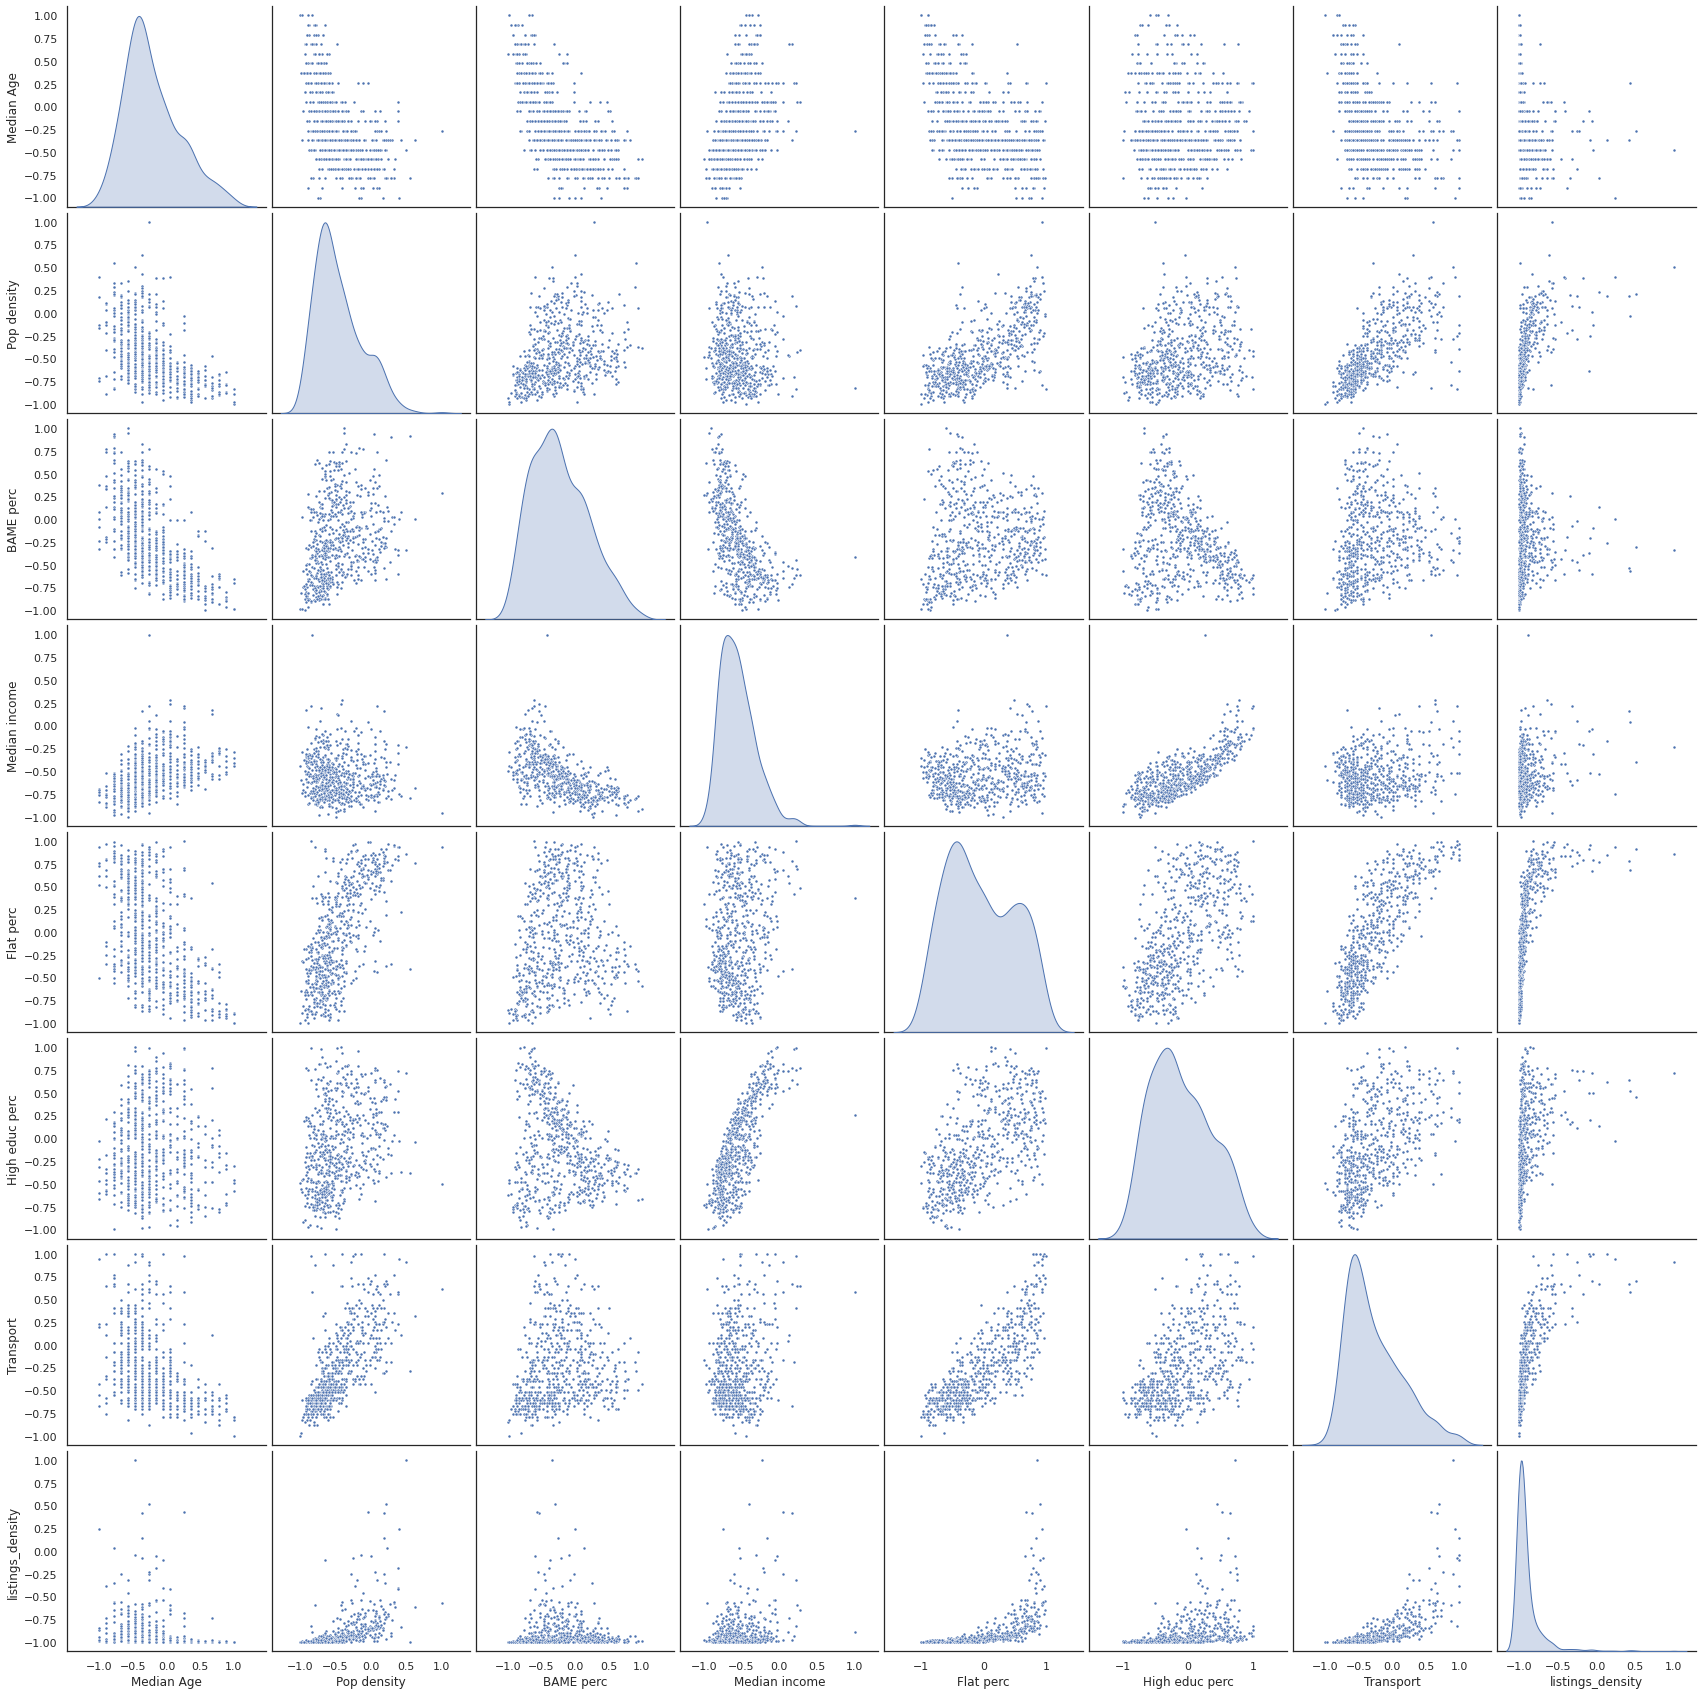

In [189]:
# quick plot to visualise the results
sns.set(style="white")
sns.pairplot(clustB, markers=".", height=3, diag_kind='kde');

In [190]:
clustB.describe()

Median Age  Pop density  BAME perc  Median income  Flat perc  \
count      625.00       625.00     625.00         625.00     625.00   
mean        -0.21        -0.45      -0.23          -0.55      -0.05   
std          0.42         0.33       0.42           0.24       0.54   
min         -1.00        -1.00      -1.00          -1.00      -1.00   
25%         -0.47        -0.69      -0.57          -0.73      -0.50   
50%         -0.26        -0.54      -0.29          -0.59      -0.13   
75%          0.05        -0.27       0.08          -0.42       0.42   
max          1.00         1.00       1.00           1.00       1.00   

       High educ perc  Transport  listings_density  
count          625.00     625.00            625.00  
mean            -0.10      -0.26             -0.90  
std              0.46       0.42              0.20  
min             -1.00      -1.00             -1.00  
25%             -0.47      -0.58             -0.99  
50%             -0.18      -0.37             -0.97  
75%              0.23      -0.01             -0.90  
max              1.00       1.00              1.00

In [191]:
#import the necessary libraries
from sklearn import metrics
from sklearn.cluster import KMeans

#create an empty list
list_SSE = []
#set the range of clusters to evaluate
min_k = 1
max_k = 11
range_k = range(min_k, max_k)

In [193]:
#iterate over the range
for i in range_k:
    #perform the clustering algorithm
    km = KMeans(n_clusters = i,
               init = "random",
               n_init = 10,
               max_iter = 300,
               tol = 1e-04, 
               random_state = 42)
    #fit this to the data
    km.fit(clustB[columns])
    #add the SEE score
    list_SSE.append(km.inertia_)   

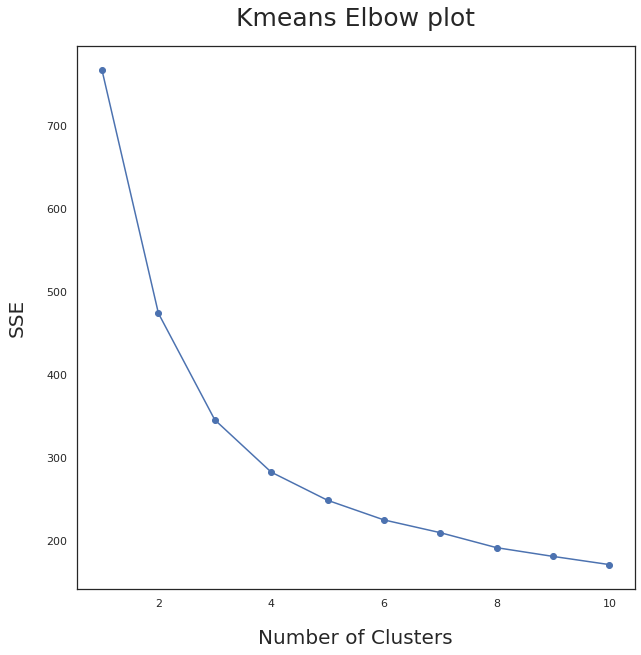

In [194]:
#create the base plots
fig, ax = plt.subplots(1,1, figsize = (10,10))

#add the data to the axis
ax.plot(range_k, list_SSE, marker = "o")

#add the necessary labels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("SSE", fontsize =20, labelpad = 20)
ax.set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)

plt.show()



In [195]:
#for the silhouette score
import random

#create an empty list
silhouette = []

#iteratre over the number of clusters to evaluate
for i in range(2,11):
    
    #create an empty list to hold the averages
    average = []
    #perform the clustering algorithm several times for each number of clusters
    for x in range(1,10):
        #set the number of clusters
        k_cluster = i
        #generate a arandom seed number
        random_seed = random.randint(1,101)
        #apply the KMeans clustering algorithm
        kmeans_method = KMeans(n_clusters = k_cluster,
                              random_state = random_seed)
        kmeans_method.fit(clustB[columns])
        #extract the labels
        labels = kmeans_method.labels_
        #extract the silhouette score
        a = metrics.silhouette_score(clustB[columns], labels)
        #append the result
        average.append(a)
    #calculate the average silhouette score for each number of clusters 
    silhouette.append(sum(average)/len(average))



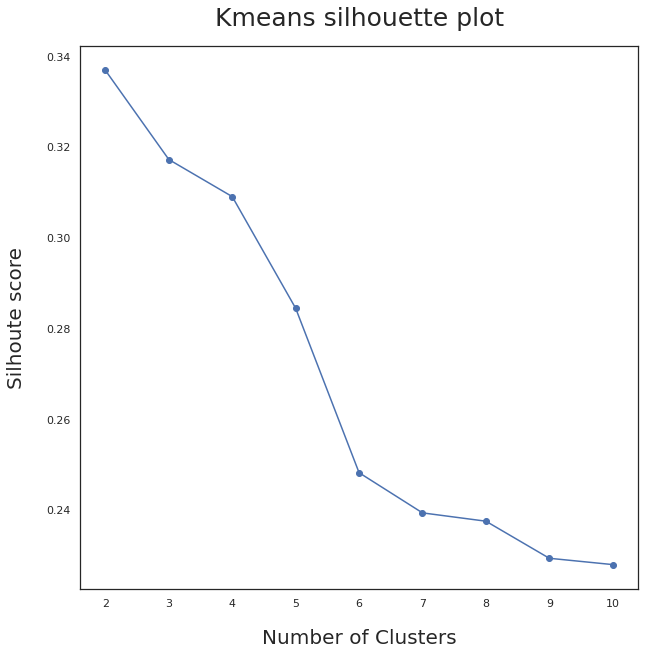

In [196]:
#create a base axis
fig, ax = plt.subplots(1,1, figsize = (10,10))

#plot the results
ax.plot(range(2,11), silhouette, marker = "o")

#add the lbels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax.set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

plt.show()

Text(0.5, 1.0, 'Kmeans Elbow plot')

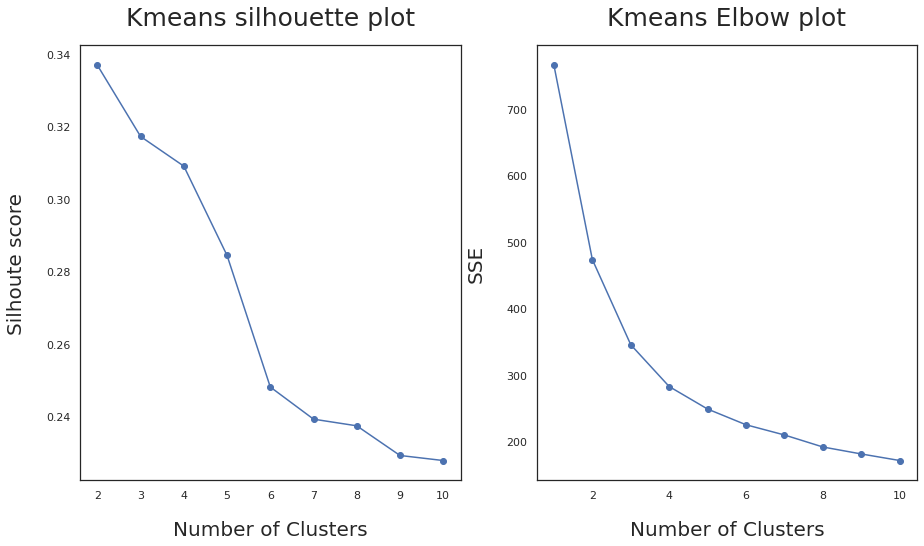

In [197]:


#combine both plots
fig, ax = plt.subplots(1,2, figsize = (15,8))

ax[0].plot(range(2,11), silhouette, marker = "o")
ax[0].set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax[0].set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax[0].set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

ax[1].plot(range_k, list_SSE, marker = "o")
ax[1].set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax[1].set_ylabel("SSE", fontsize =20, labelpad = 20)
ax[1].set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)



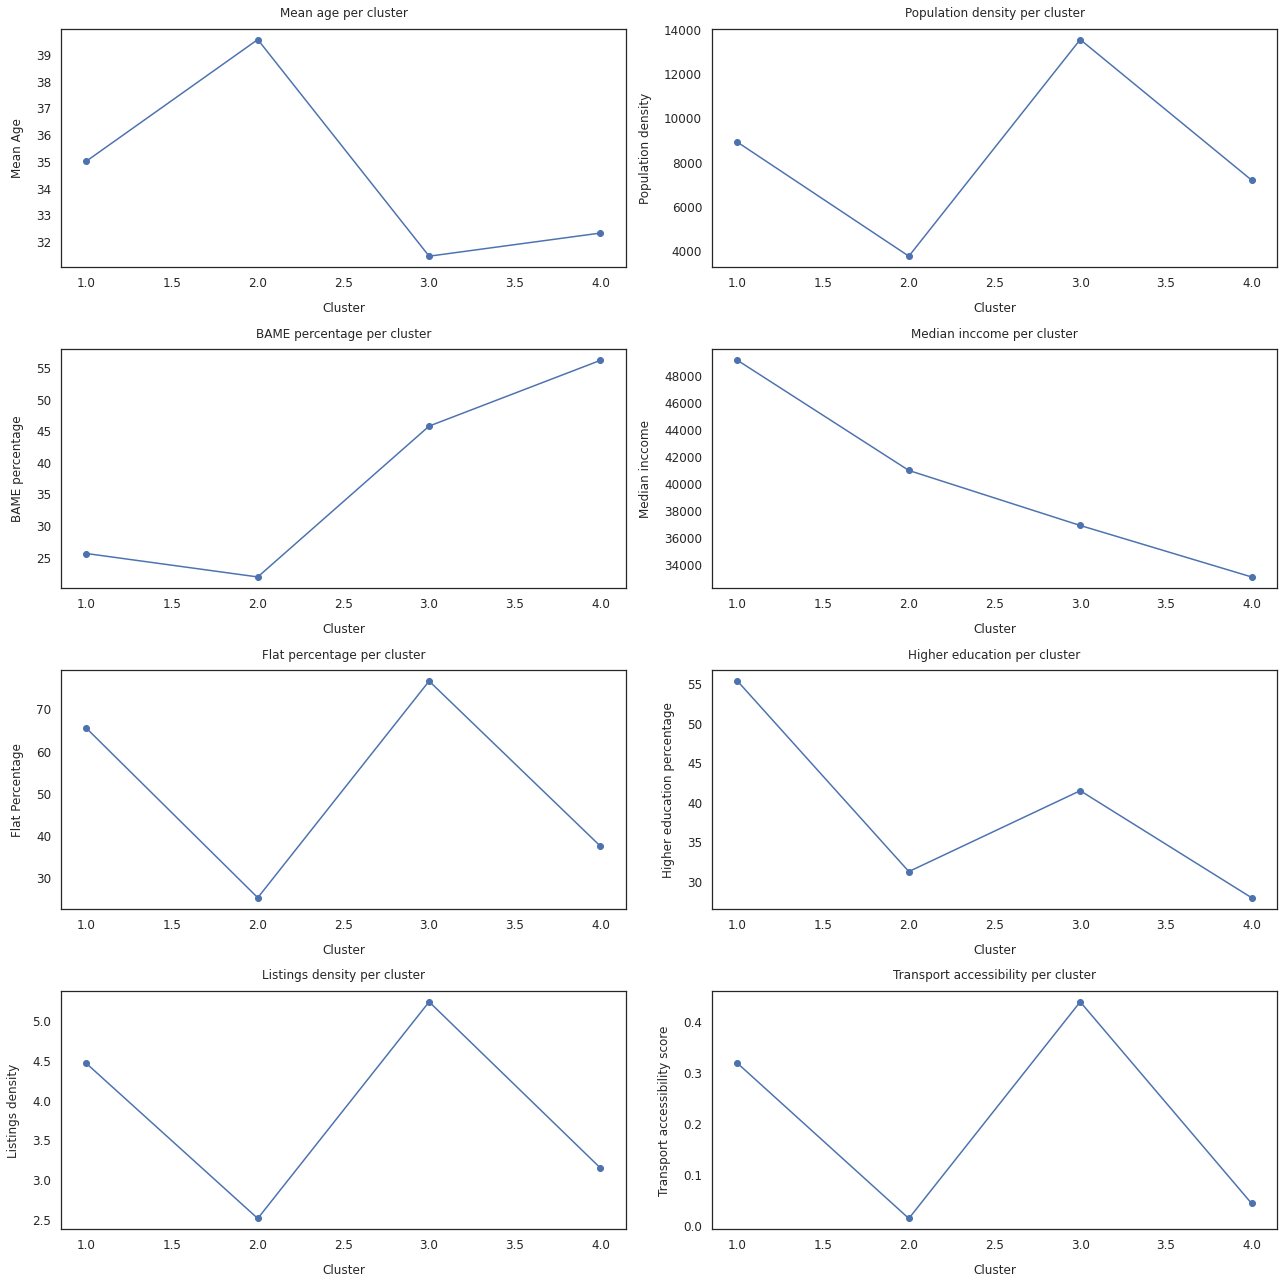

In [198]:
#perform the clustering with the chosen number of clusters
kmeans_method = KMeans(n_clusters = 4,
                        random_state = 22,
                      n_init = 10)
kmeans_method.fit(clustA[columns])


#creating plots for the results to understand the means


#set the titles
titles = [ "Mean age per cluster",
            "Population density per cluster",
            "BAME percentage per cluster",
            "Median inccome per cluster",
            "Flat percentage per cluster",
            "Higher education per cluster",
            "Listings density per cluster",
            "Transport accessibility per cluster" ]
#set the labels
ylabels = ["Mean Age", 
            "Population density",
            "BAME percentage",
            "Median inccome",
            "Flat Percentage",
            "Higher education percentage",
            "Listings density",
            "Transport accessibility score"]
#extract the cluster labels and add these back to the data
labels = kmeans_method.labels_
London_profiles["labels"] = labels
London_profiles["labels"] = London_profiles["labels"] + 1

#create a base plot
fig, ax = plt.subplots(4,2, figsize = (18,18))
#flatten the axis
axis = ax.flatten()

#iterate over each column to create plots for each 
for i, col in enumerate(columns):
    #create an empty dictionary
    col_dict = {}
     #iterate over each label
        
    for label in London_profiles["labels"].unique().tolist():
        #crete a new dataframe for each label
        label_df = London_profiles[London_profiles["labels"] == label]
        #add the mean to the dataframe
        col_dict[label] = label_df[col].mean()
    #convert the dictionary to a dataframe
    column_df = pd.DataFrame.from_dict(col_dict, orient = "index")
    #reset the index
    column_df.reset_index(inplace=True)
    #sort the values by the index
    column_df.sort_values(by = "index", inplace=True)

        #plot the results
    axis[i].plot(column_df["index"], column_df[0],
                marker = "o")
    
    #set the plots up
    axis[i].set_title(titles[i], fontsize = 12, pad = 12)
    axis[i].set_xlabel("Cluster", fontsize = 12, labelpad = 12)
    axis[i].set_ylabel(ylabels[i], fontsize =12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12)


#set the layout to tight so no overalp
plt.tight_layout()
 

In [199]:
#extract the number of wards within each clusterc 
London_profiles["labels"].value_counts()

4    186
2    158
3    155
1    126
Name: labels, dtype: int64

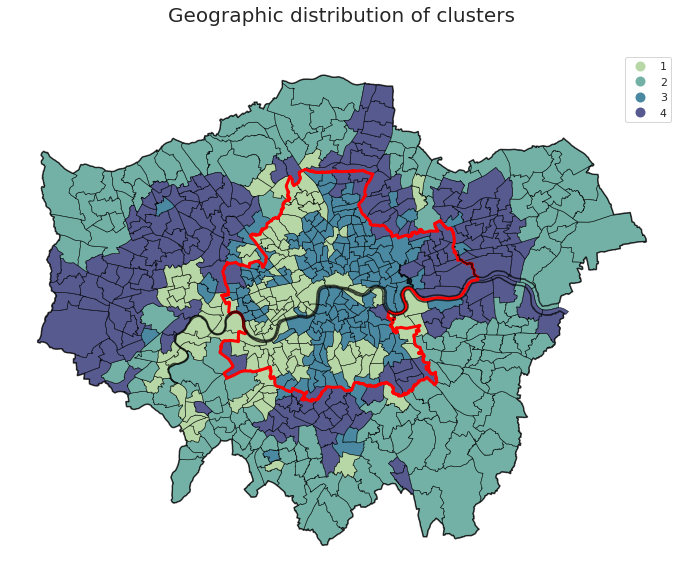

In [224]:
# map the clusters
fig, ax = plt.subplots(1,1, figsize = (12,12))

ldn_shape.boundary.plot(ax = ax, color = "black", alpha = 0.7)

London_profiles.plot(ax = ax,column='labels',categorical = True, cmap="crest",legend=True,
          edgecolor='black',linewidth=0.6, figsize=(10,8), alpha=0.8)

# add the inner london boundary 
gpd.GeoSeries(boros_il.unary_union).plot(ax=ax, edgecolor="red", facecolor="none", linewidth=3)

#set the title
ax.set_title("Geographic distribution of clusters", fontsize = 20,
            pad = 30)
ax.set_axis_off()